In [ ]:
# 2

출처: https://www.kaggle.com/code/bertcarremans/data-preparation-exploration/notebook

# Introduction

1. Visual inspection of your data
2. Defining the metadata
3. Descriptive statistics
4. Handling imbalanced classes
5. Data quality checks
6. Exploratory data visualization
7. Feature engineering
8. Feature selection
9. Feature scaling

------------

# Loading packages

In [1]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option("display.max_columns", 100)

# Loading data

In [2]:
train = pd.read_csv("./porto_seguro/train.csv")
test = pd.read_csv("./porto_seguro/test.csv")

# Data at first sight

- 비슷한 그룹에 속해있는 Feature는 ind, reg, car,calc 같은 이름이 붙어있다.
- binary features인지 categorical features인지 나타내기 위해 맨뒤에 bin이나 cat라고 붙어있다.
- 위의 명칭이 붙어 있지 않는 칼럼은 연속형이나 순서형 자료
- -1은 결측치를 나타낸다.
- Target 칼럼은 보험 계약자가 보험 청구 유무를 나타낸다.

In [3]:
train.head()

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  \
0              0              0              1              0              0   
1              0              0              0              1              0   
2              0              0              0              1              0   
3              0              1              0              0              0   
4              0              1              0              0              0   

   ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  ps_ind_13_bin  ps_ind_14  \
0              0              0              0              0          0   
1              0              0              0              0          0   
2              0              0              0              0          0   
3              0              0              0              0          0   
4              0              0              0              0          0   

   ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  ps_reg_01  \
0         11              0              1              0        0.7   
1          3              0              0              1        0.8   
2         12              1              0              0        0.0   
3          8              1              0              0        0.9   
4          9              1              0              0        0.7   

   ps_reg_02  ps_reg_03  ps_car_01_cat  ps_car_02_cat  ps_car_03_cat  \
0        0.2   0.718070             10              1             -1   
1        0.4   0.766078             11              1             -1   
2        0.0  -1.000000              7              1             -1   
3        0.2   0.580948              7              1              0   
4        0.6   0.840759             11              1             -1   

   ps_car_04_cat  ps_car_05_cat  ps_car_06_cat  ps_car_07_cat  ps_car_08_cat  \
0              0              1              4              1              0   
1              0             -1             11              1              1   
2              0             -1             14              1              1   
3              0              1             11              1              1   
4              0             -1             14              1              1   

   ps_car_09_cat  ps_car_10_cat  ps_car_11_cat  ps_car_11  ps_car_12  \
0              0              1             12          2   0.400000   
1              2              1             19          3   0.316228   
2              2              1             60          1   0.316228   
3              3              1            104          1   0.374166   
4              2              1             82          3   0.316070   

   ps_car_13  ps_car_14  ps_car_15  ps_calc_01  ps_calc_02  ps_calc_03  \
0   0.883679   0.370810   3.605551         0.6         0.5         0.2   
1   0.618817   0.388716   2.449490         0.3         0.1         0.3   
2   0.641586   0.347275   3.316625         0.5         0.7         0.1   
3   0.542949   0.294958   2.000000         0.6         0.9         0.1   
4   0.565832   0.365103   2.000000         0.4         0.6         0.0   

   ps_calc_04  ps_calc_05  ps_calc_06  ps_calc_07  ps_calc_08  ps_calc_09  \
0           3           1          10           1          10           1   
1           2           1           9           5           8           1   
2           2           2           9           1           8           2   
3           2           4           7           1           8           4   
4           2           2           6   

In [4]:
train.tail()

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
595207  1488013       0          3              1         10              0   
595208  1488016       0          5              1          3              0   
595209  1488017       0          1              1         10              0   
595210  1488021       0          5              2          3              1   
595211  1488027       0          0              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
595207              0              0              0              0   
595208              0              0              0              0   
595209              0              1              0              0   
595210              0              0              0              1   
595211              0              1              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
595207              1              0              0              0   
595208              1              0              0              0   
595209              0              0              0              0   
595210              0              0              0              0   
595211              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
595207              0          0         13              1              0   
595208              0          0          6              1              0   
595209              0          0         12              1              0   
595210              0          0         12              1              0   
595211              0          0          7              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
595207              0        0.5        0.3   0.692820             10   
595208              0        0.9        0.7   1.382027              9   
595209              0        0.9        0.2   0.659071              7   
595210              0        0.9        0.4   0.698212             11   
595211              0        0.1        0.2  -1.000000              7   

        ps_car_02_cat  ps_car_03_cat  ps_car_04_cat  ps_car_05_cat  \
595207              1             -1              0              1   
595208              1             -1              0             -1   
595209              1             -1              0             -1   
595210              1             -1              0             -1   
595211              0             -1              0             -1   

        ps_car_06_cat  ps_car_07_cat  ps_car_08_cat  ps_car_09_cat  \
595207              1              1              1              0   
595208             15              0              0              2   
595209              1              1              1              2   
595210             11              1              1              2   
595211              0              1              0              2   

        ps_car_10_cat  ps_car_11_cat  ps_car_11  ps_car_12  ps_car_13  \
595207              1             31          3   0.374166   0.684631   
595208              1             63          2   0.387298   0.972145   
595209              1             31          3   0.397492   0.596373   
595210              1            101          3   0.374166   0.764434   
595211              1             34          2   0.400000   0.932649   

        ps_car_14  ps_car_15  ps_calc_01  ps_calc_02  ps_calc_03  ps_calc_04  \
595207   0.385487   2.645751         0.4         0.5         0.3           3   
595208  -1.000000   3.605551         0.2         0.2         0.0           2   
595209   0.398748   1.732051         0.4         0.0         0.3           3   
595210   0.384968   3.162278         0.0         0.7         0.0           4   
595211   0.378021   3.741657         0.4         0.0         0.5           2   

        ps_calc_05  ps_calc_06  

In [5]:
train.shape

(595212, 59)

In [6]:
# 중복이 있는지 확인
train.drop_duplicates()
train.shape

(595212, 59)

중복 열은 없습니다.

In [7]:
test.shape

(892816, 58)

각각의 변수 타입을 확인해봅시다.

그래야 나중에 14개의 범주형 변수에 대해 dummy variables(가변수: 독립변수를 0과 1로 변환한 변수)로 만들 수 있습니다.

bin이 들어간 칼럼은 이미 binary 값을 가지기 때문에 가변수화할 필요가 없습니다.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

# Metadata

데이터 관리를 용이하게 하기 위해, 데이터 프레임의 변수에 관한 메타데이터를 저장할 것입니다. 이는 분석, 시각화, 모델링을 위한 특정한 변수를 선택하는데 도움을 줄 것입니다.

구체적으로 저장할 것들:
- **role**: input, ID, target
- **level**: nominal, interval(구간 자료: 자료가 일정한 구간의 뜻을 가지고 있어, 나타난 숫자의 덧셈이나 뺄셈의 결과는 의미가 있지만 곱셈이나 나눗셈의 결과는 의미가 없는 자료), ordinal, binary
- **keep**: True or False
- **dtype**: int, float, str

In [9]:
data = []
for f in train.columns:
    # role 정의
    if f == "target":
        role = "target"
    elif f == "id":
        role = "id"
    else:
        role = "input"
        
    # level 정의
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif np.issubdtype(train[f].dtype, np.floating):
        level = 'interval'
    elif np.issubdtype(train[f].dtype, np.integer):
        level = 'ordinal'
        
    # id를 제외한 모든 변수에 대해 True로 초기화
    keep = True
    if f == "id":
        keep = False
    
    # dtype 정의
    dtype = train[f].dtype
    
    # 메타데이터를 담은 딕셔너리를 만든다
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index("varname", inplace=True)

In [10]:
meta

role     level   keep    dtype
varname                                         
id                  id   nominal  False    int64
target          target    binary   True    int64
ps_ind_01        input   ordinal   True    int64
ps_ind_02_cat    input   nominal   True    int64
ps_ind_03        input   ordinal   True    int64
ps_ind_04_cat    input   nominal   True    int64
ps_ind_05_cat    input   nominal   True    int64
ps_ind_06_bin    input    binary   True    int64
ps_ind_07_bin    input    binary   True    int64
ps_ind_08_bin    input    binary   True    int64
ps_ind_09_bin    input    binary   True    int64
ps_ind_10_bin    input    binary   True    int64
ps_ind_11_bin    input    binary   True    int64
ps_ind_12_bin    input    binary   True    int64
ps_ind_13_bin    input    binary   True    int64
ps_ind_14        input   ordinal   True    int64
ps_ind_15        input   ordinal   True    int64
ps_ind_16_bin    input    binary   True    int64
ps_ind_17_bin    input    binary   True    int64
ps_ind_18_bin    input    binary   True    int64
ps_reg_01        input  interval   True  float64
ps_reg_02        input  interval   True  float64
ps_reg_03        input  interval   True  float64
ps_car_01_cat    input   nominal   True    int64
ps_car_02_cat    input   nominal   True    int64
ps_car_03_cat    input   nominal   True    int64
ps_car_04_cat    input   nominal   True    int64
ps_car_05_cat    input   nominal   True    int64
ps_car_06_cat    input   nominal   True    int64
ps_car_07_cat    input   nominal   True    int64
ps_car_08_cat    input   nominal   True    int64
ps_car_09_cat    input   nominal   True    int64
ps_car_10_cat    input   nominal   True    int64
ps_car_11_cat    input   nominal   True    int64
ps_car_11        input   ordinal   True    int64
ps_car_12        input  interval   True  float64
ps_car_13        input  interval   True  float64
ps_car_14        input  interval   True  float64
ps_car_15        input  interval   True  float64
ps_calc_01       input  interval   True  float64
ps_calc_02       input  interval   True  float64
ps_calc_03       input  interval   True  float64
ps_calc_04       input   ordinal   True    int64
ps_calc_05       input   ordinal   True    int64
ps_calc_06       input   ordinal   True    int64
ps_calc_07       input   ordinal   True    int64
ps_calc_08       input   ordinal   True    int64
ps_calc_09       input   ordinal   True    int64
ps_calc_10       input   ordinal   True    int64
ps_calc_11       input   ordinal   True    int64
ps_calc_12       input   ordinal   True    int64
ps_calc_13       input   ordinal   True    int64
ps_calc_14       input   ordinal   True    int64
ps_calc_15_bin   input    binary   True    int64
ps_calc_16_bin   input    binary   True    int64
ps_calc_17_bin   input    binary   True    int64
ps_calc_18_bin   input    binary   True    int64
ps_calc_19_bin   input    binary   True    int64
ps_calc_20_bin   input    binary   True    int64

삭제되지 않은 명목형 변수를 추출하는 예

In [11]:
meta[(meta.level == "nominal") & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

role과 level에 속한 변수의 수

In [12]:
pd.DataFrame({"count": meta.groupby(["role", "level"])["role"].size()}).reset_index()

role     level  count
0      id   nominal      1
1   input    binary     17
2   input  interval     10
3   input   nominal     14
4   input   ordinal     16
5  target    binary      1

# Descriptive statistics
카테고리형 변수나 id는 mean, std 등을 계산하는 것이 의미가 없습니다. 따라서 특정한 변수들만 골라 기술적 통계를 계산해봅니다
## Interval variables

In [13]:
v = meta[(meta.level == "interval") & (meta.keep)].index
train[v].describe()

ps_reg_01      ps_reg_02      ps_reg_03      ps_car_12  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        0.610991       0.439184       0.551102       0.379945   
std         0.287643       0.404264       0.793506       0.058327   
min         0.000000       0.000000      -1.000000      -1.000000   
25%         0.400000       0.200000       0.525000       0.316228   
50%         0.700000       0.300000       0.720677       0.374166   
75%         0.900000       0.600000       1.000000       0.400000   
max         0.900000       1.800000       4.037945       1.264911   

           ps_car_13      ps_car_14      ps_car_15     ps_calc_01  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        0.813265       0.276256       3.065899       0.449756   
std         0.224588       0.357154       0.731366       0.287198   
min         0.250619      -1.000000       0.000000       0.000000   
25%         0.670867       0.333167       2.828427       0.200000   
50%         0.765811       0.368782       3.316625       0.500000   
75%         0.906190       0.396485       3.605551       0.700000   
max         3.720626       0.636396       3.741657       0.900000   

          ps_calc_02     ps_calc_03  
count  595212.000000  595212.000000  
mean        0.449589       0.449849  
std         0.286893       0.287153  
min         0.000000       0.000000  
25%         0.200000       0.200000  
50%         0.400000       0.500000  
75%         0.700000       0.700000  
max         0.900000       0.900000

**reg variables**
- 오직 ps_reg_03만 결측치를 가지고 있다.
- 변수간 데이터 범주(min ~ max)가 다르다. 따라서, 스케일링을 적용해줄 수 있다. (하지만, 분류기에 따라 다름)

**car variables**
- ps_car_12와 ps_car_15는 결측치를 가지고 있다.
- 데이터 범주가 다르기 때문에 스케일링을 적용할 수 있다.

**calc variables**
- 결측치가 없다.
- 최댓값이 0.9인 것으로 보아 비율인 것 같습니다.
- 3개의 _cal 변수는 비슷한 분포를 가지고 있습니다.



## Ordinal variables

In [14]:
v = meta[(meta.level == "ordinal") & (meta.keep)].index
train[v].describe()

ps_ind_01      ps_ind_03      ps_ind_14      ps_ind_15  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        1.900378       4.423318       0.012451       7.299922   
std         1.983789       2.699902       0.127545       3.546042   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       2.000000       0.000000       5.000000   
50%         1.000000       4.000000       0.000000       7.000000   
75%         3.000000       6.000000       0.000000      10.000000   
max         7.000000      11.000000       4.000000      13.000000   

           ps_car_11     ps_calc_04     ps_calc_05     ps_calc_06  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        2.346072       2.372081       1.885886       7.689445   
std         0.832548       1.117219       1.134927       1.334312   
min        -1.000000       0.000000       0.000000       0.000000   
25%         2.000000       2.000000       1.000000       7.000000   
50%         3.000000       2.000000       2.000000       8.000000   
75%         3.000000       3.000000       3.000000       9.000000   
max         3.000000       5.000000       6.000000      10.000000   

          ps_calc_07     ps_calc_08     ps_calc_09     ps_calc_10  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        3.005823       9.225904       2.339034       8.433590   
std         1.414564       1.459672       1.246949       2.904597   
min         0.000000       2.000000       0.000000       0.000000   
25%         2.000000       8.000000       1.000000       6.000000   
50%         3.000000       9.000000       2.000000       8.000000   
75%         4.000000      10.000000       3.000000      10.000000   
max         9.000000      12.000000       7.000000      25.000000   

          ps_calc_11     ps_calc_12     ps_calc_13     ps_calc_14  
count  595212.000000  595212.000000  595212.000000  595212.000000  
mean        5.441382       1.441918       2.872288       7.539026  
std         2.332871       1.202963       1.694887       2.746652  
min         0.000000       0.000000       0.000000       0.000000  
25%         4.000000       1.000000       2.000000       6.000000  
50%         5.000000       1.000000       3.000000       7.000000  
75%         7.000000       2.000000       4.000000       9.000000  
max        19.000000      10.000000      13.000000      23.000000

- ps_car_11만 결측치가 있다.
- 데이터 범주가 다르기 때문에 스케일링을 해줘야 한다.

## Binary variables

In [15]:
v = meta[(meta.level == "binary") & (meta.keep)].index
train[v].describe()

target  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        0.036448       0.393742       0.257033       0.163921   
std         0.187401       0.488579       0.436998       0.370205   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       1.000000       1.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        0.185304       0.000373       0.001692       0.009439   
std         0.388544       0.019309       0.041097       0.096693   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       ps_ind_13_bin  ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        0.000948       0.660823       0.121081       0.153446   
std         0.030768       0.473430       0.326222       0.360417   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       1.000000       0.000000       0.000000   
75%         0.000000       1.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
count   595212.000000   595212.000000   595212.000000   595212.000000   
mean         0.122427        0.627840        0.554182        0.287182   
std          0.327779        0.483381        0.497056        0.452447   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          0.000000        1.000000        1.000000        0.000000   
75%          0.000000        1.000000        1.000000        1.000000   
max          1.000000        1.000000        1.000000        1.000000   

       ps_calc_19_bin  ps_calc_20_bin  
count   595212.000000   595212.000000  
mean         0.349024        0.153318  
std          0.476662        0.360295  
min          0.000000        0.000000  
25%          0.000000        0.000000  
50%          0.000000        0.000000  
75%          1.000000        0.000000  
max          1.000000        1.000000

- train data에서의 a priori probability(원하는 결과/총 결과 수)는 3.645%에 불과합니다. 이는 데이터가 매우 불균형하다는 것을 알 수 있습니다.
- mean 값을 통해 대부분의 값이 0이라는 것을 알 수 있다.

# Handling imbalanced classes

target에서 1은 0보다 훨씬 적다. 이러한 문제들을 해결하기 위한 두가지 방법이 있다.

- target=1을 오버샘플링
- target=0을 언더샘플링

여기서는 train data의 크기가 꽤 크므로 **언더샘플링**을 진행한다.


(**언더 샘플링은 불균형한 데이터 셋에서 높은 비율을 차지하던 클래스의 데이터 수를 줄임으로써 데이터 불균형을 해소하는 아이디어. 하지만, 이 방법은 학습에 사용되는 전체 데이터 수를 급격하게 감소시켜 오히려 성능이 떨어질 수 있습니다.**

**오버 샘플링은 낮은 비율 클래스의 데이터 수를 늘림으로써 데이터 불균형을 해소하는 아이디어 입니다.**)

In [16]:
desired_apriori = 0.1

idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# undersampling 비율과 target=0의 개수를 프린트
undersampling_rate = ((1 - desired_apriori) * nb_1) / (nb_0 * desired_apriori)
undersampled_nb_0 = int(undersampling_rate * nb_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# 랜덤하게 선택
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)


# 남아있는 인덱스로 리스트 생성
idx_list = list(undersampled_idx) + list(idx_1)

train = train.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


# Data Quality Checks
## Checking missing values

결측치는 -1

In [17]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings / train.shape[0]
        
        print(f"Variable {f} has {missings} records ({missings_perc:.2%}) with missing values")
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


- **ps_car_03_cat, ps_car_05_cat**은 결측치의 비율이 굉장히 높습니다. 따라서 이 변수들을 제거
- 다른 카테고리형 변수들은 -1을 그대로 둡니다.
- **ps_reg_03** (continuous)는 18% 정도가 결측치입니다. 결측치를 평균값으로 바꿔줍니다.
- **ps_car_11** (ordinal)는 5개만 결측치입니다. 결측치를 최빈값으로 바꿔줍니다.
- **ps_car_14** (continuous)는 7% 정도가 결측치입니다. 결측치를 평균값으로 바꿔줍니다.

In [18]:
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop), "keep"] = False # meta 업데이트

# Imputing mean or mode
mean_imp = SimpleImputer(missing_values=-1, strategy="mean")
mode_imp = SimpleImputer(missing_values=-1, strategy="most_frequent")
train["ps_reg_03"] = mean_imp.fit_transform(train[["ps_reg_03"]]).ravel() # 2D를 넣어줘야 한다
train["ps_car_14"] = mean_imp.fit_transform(train[["ps_car_14"]]).ravel()
train["ps_car_11"] = mode_imp.fit_transform(train[["ps_car_11"]]).ravel()

## Checking the cardinality of the categorical variables

- Cardinality는 칼럼 안에서의 다른 값의 개수를 나타냅니다. 

- 나중에 카테고리형 변수에서 가변수를 만들 것이기 때문에, 많은 distinct value(칼럼에서의 unique 값)가 있는지 확인해야합니다. 

- 많은 가변수를 만들 것이기 때문에 이러한 칼럼들을 다르게 처리해야 합니다.

In [19]:
v = meta[(meta.level == "nominal") & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


ps_car_11_cat이 유독 많은 distnict value를 갖고 있습니다.

### Target encoding with smoothing

**Target encoding 설명:** https://choisk7.github.io/ml/encoding/ \
**Data Leakage:** training 데이터 밖의 데이터가 모델을 만드는데 사용되는 것

<br/>
<br/>

min_samples_leaf는 prior mean과 target mean(주어진 categoy values에 대한)이 동일한 가중치를 갖는 임계값을 정의합니다.

value count에 대한 weight 동작은 smoothing parameter에 의해 제어됩니다.

In [20]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series))) # 랜덤으로 표준정규분포 생성

def target_encode(trn_series=None,
                  tst_series=None,
                  target=None,
                  min_samples_leaf=1,
                  smoothing=1,
                  noise_level=0):
    '''
    trn_series: training categorical feature (pd.Series)
    tst_series: test cateogrical feature (pd.Series)
    target: target data (pd.Series)
    min_samples_leaf (int): 카테고리형 변수 평균을 고려하기 위한 최소 샘플
    smoothing (int): smoothing은 categorical average와 categorical average와 prior 균형을 맞춰준다.
    '''
    
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    
    # target mean 계산
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    
    # smoothing 계산 (sigmoid)
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    
    # prior: 발생 확률
    prior = target.mean()
    
    # count가 클수록 전체 평균이 덜 고려된다.
    # target 킬럼 추가
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    
    
    # trn_series와 tst_series에 averages를 적용
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name), # tsn_series에 칼럼이름 추가 (ps_car_11_cat)
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    
    # pd.merge는 인덱스를 유지하지 않으므로 저장
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    ft_tst_series.index = tst_series.index
    
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [21]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)

train["ps_car_11_cat_te"] = train_encoded
train.drop("ps_car_11_cat", axis=1, inplace=True)
meta.loc["ps_car_11_cat", "keep"] = False # meta 업데이트
test["ps_car_11_cat_te"] = test_encoded
test.drop("ps_car_11_cat", axis=1, inplace=True)

# Exploratory Data Visualization
## Categorical variables
category형 변수들과 target=1인 고객들의 비율을 살펴봅시다.

<Figure size 2400x1500 with 0 Axes>

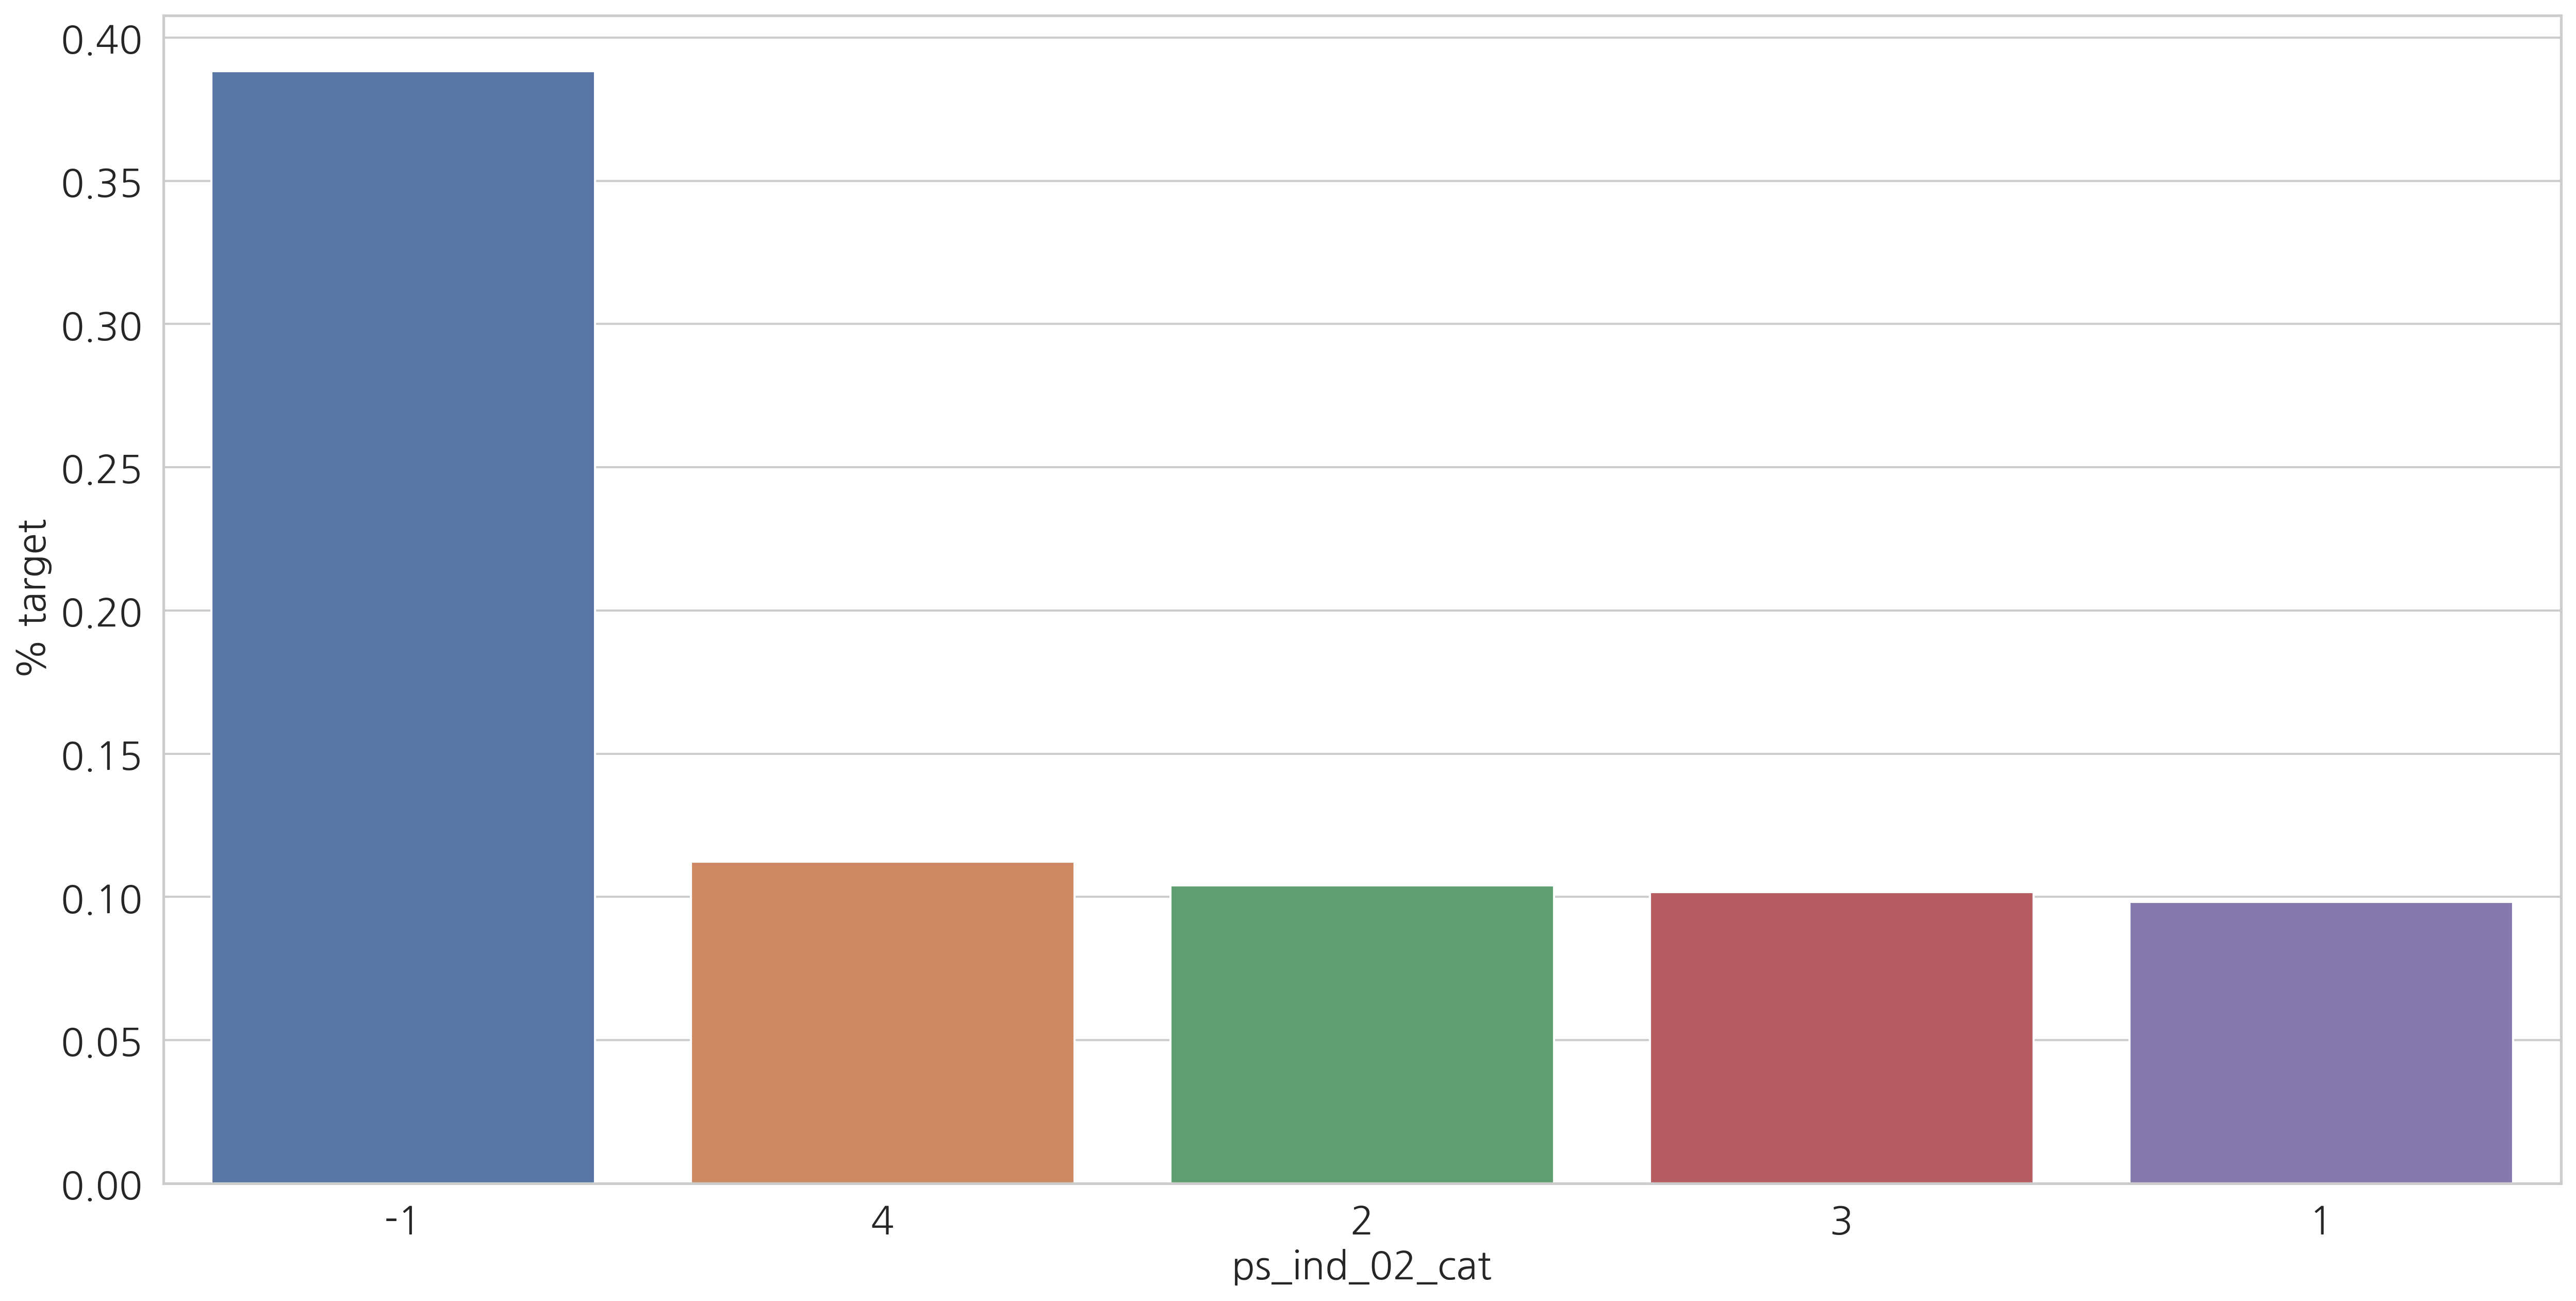

<Figure size 2400x1500 with 0 Axes>

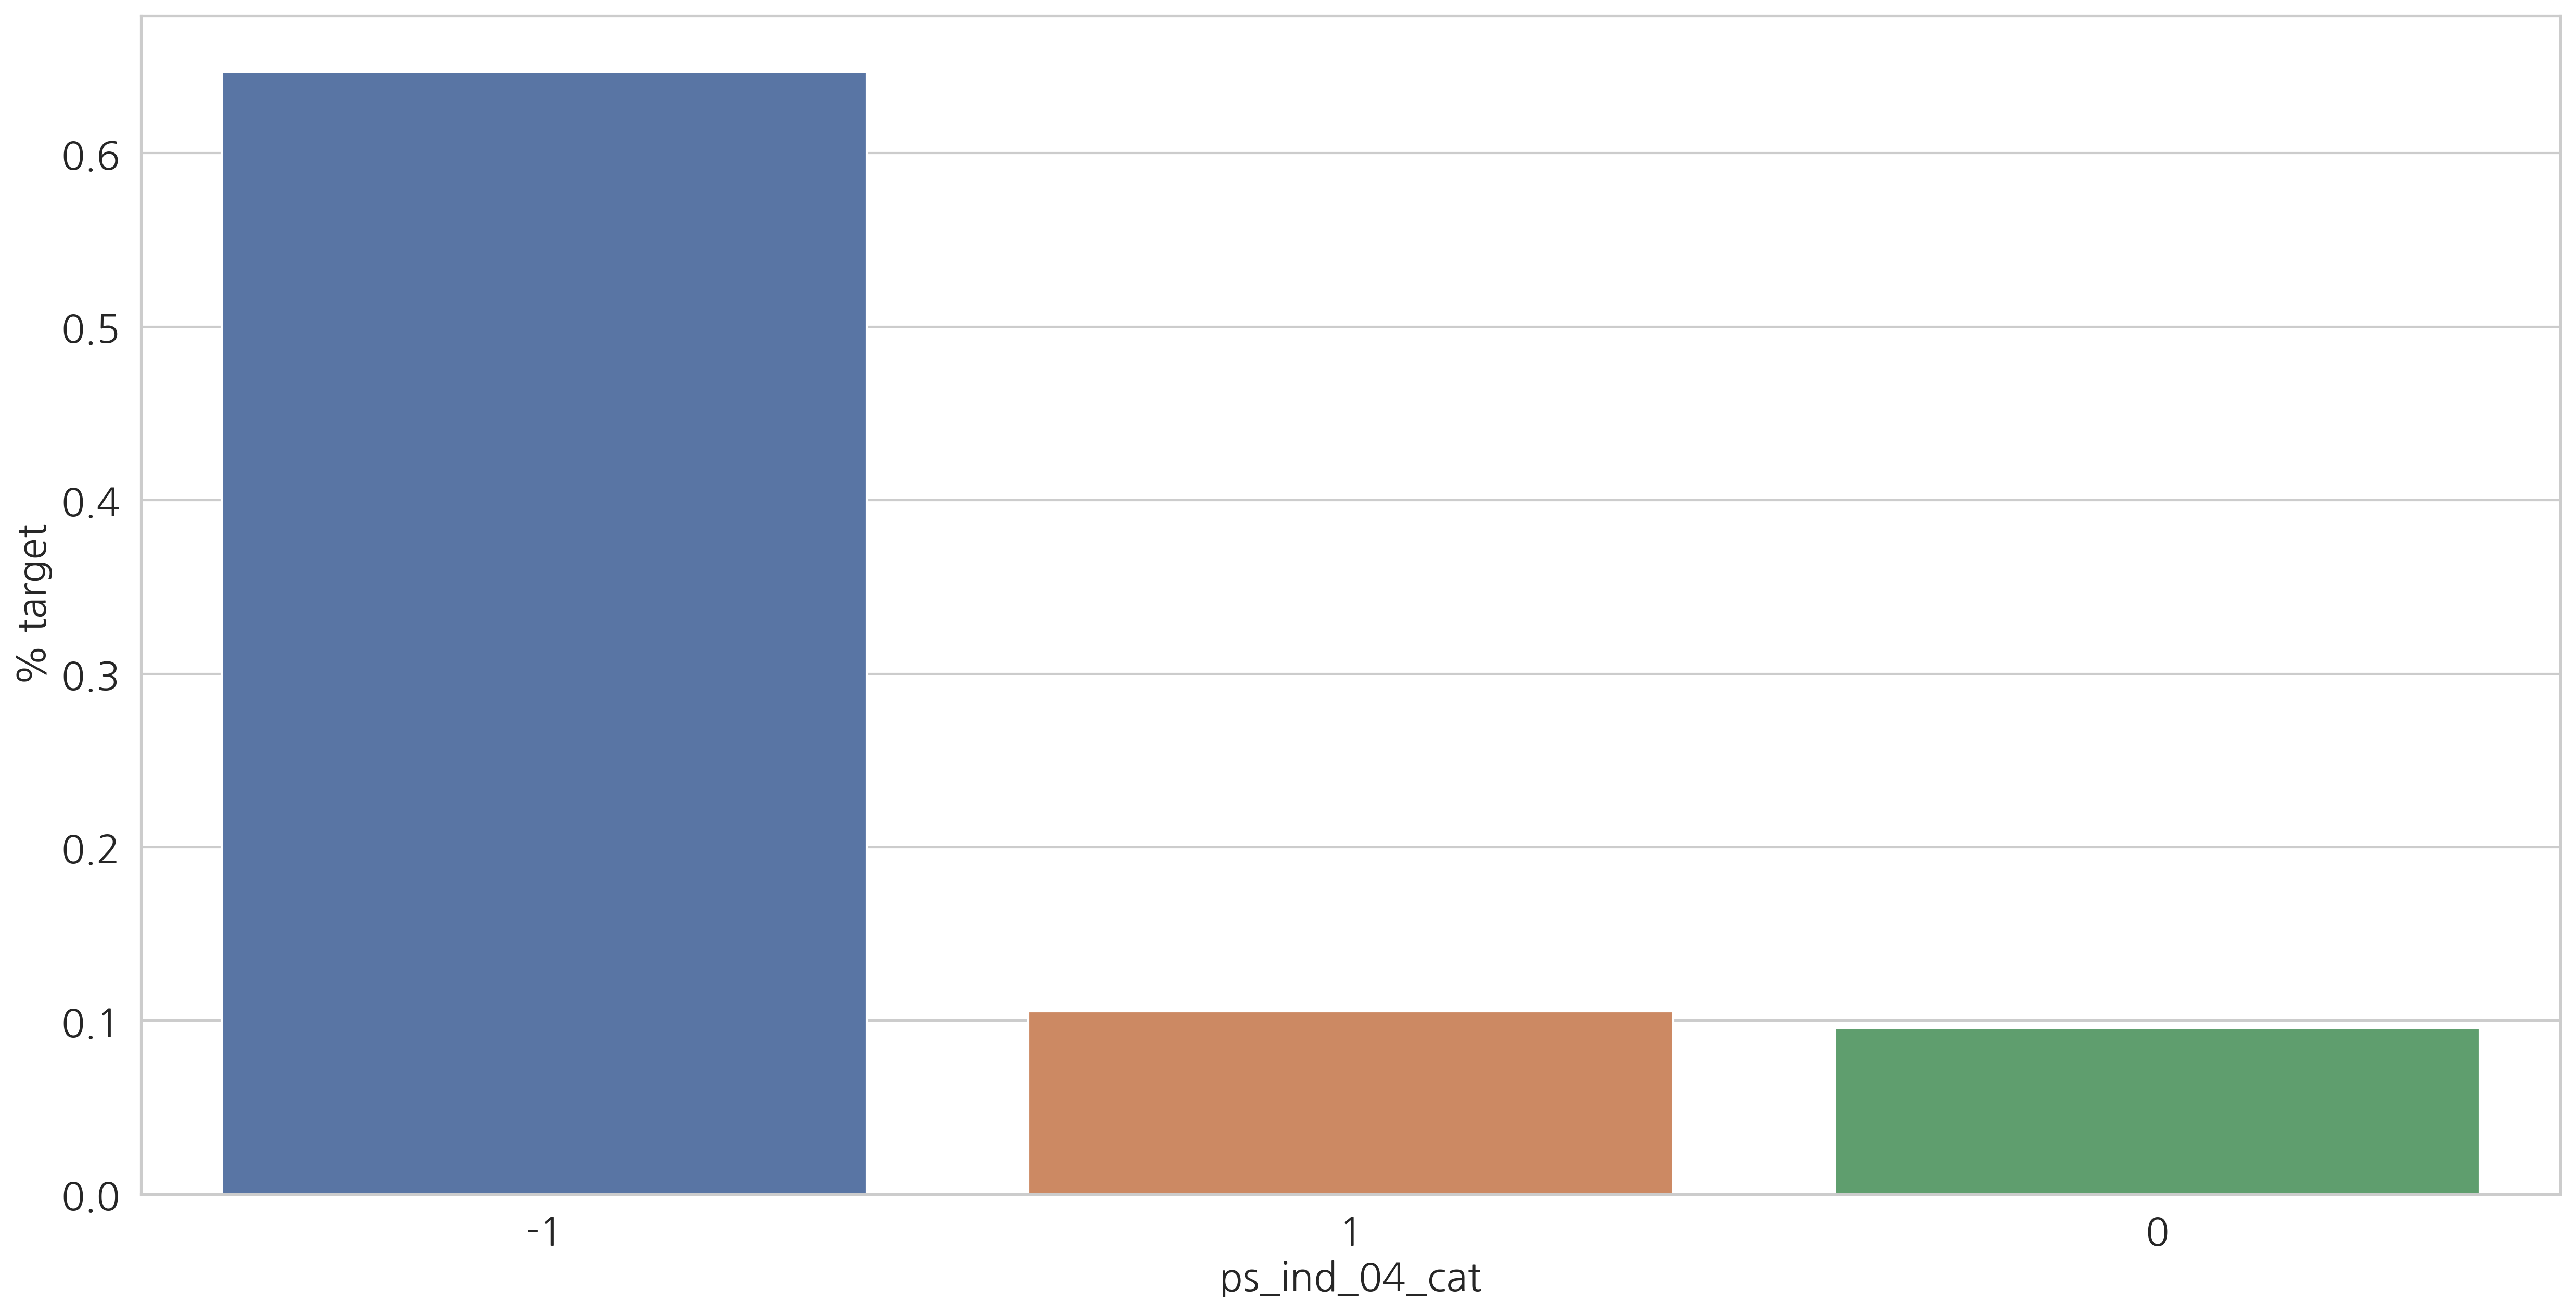

<Figure size 2400x1500 with 0 Axes>

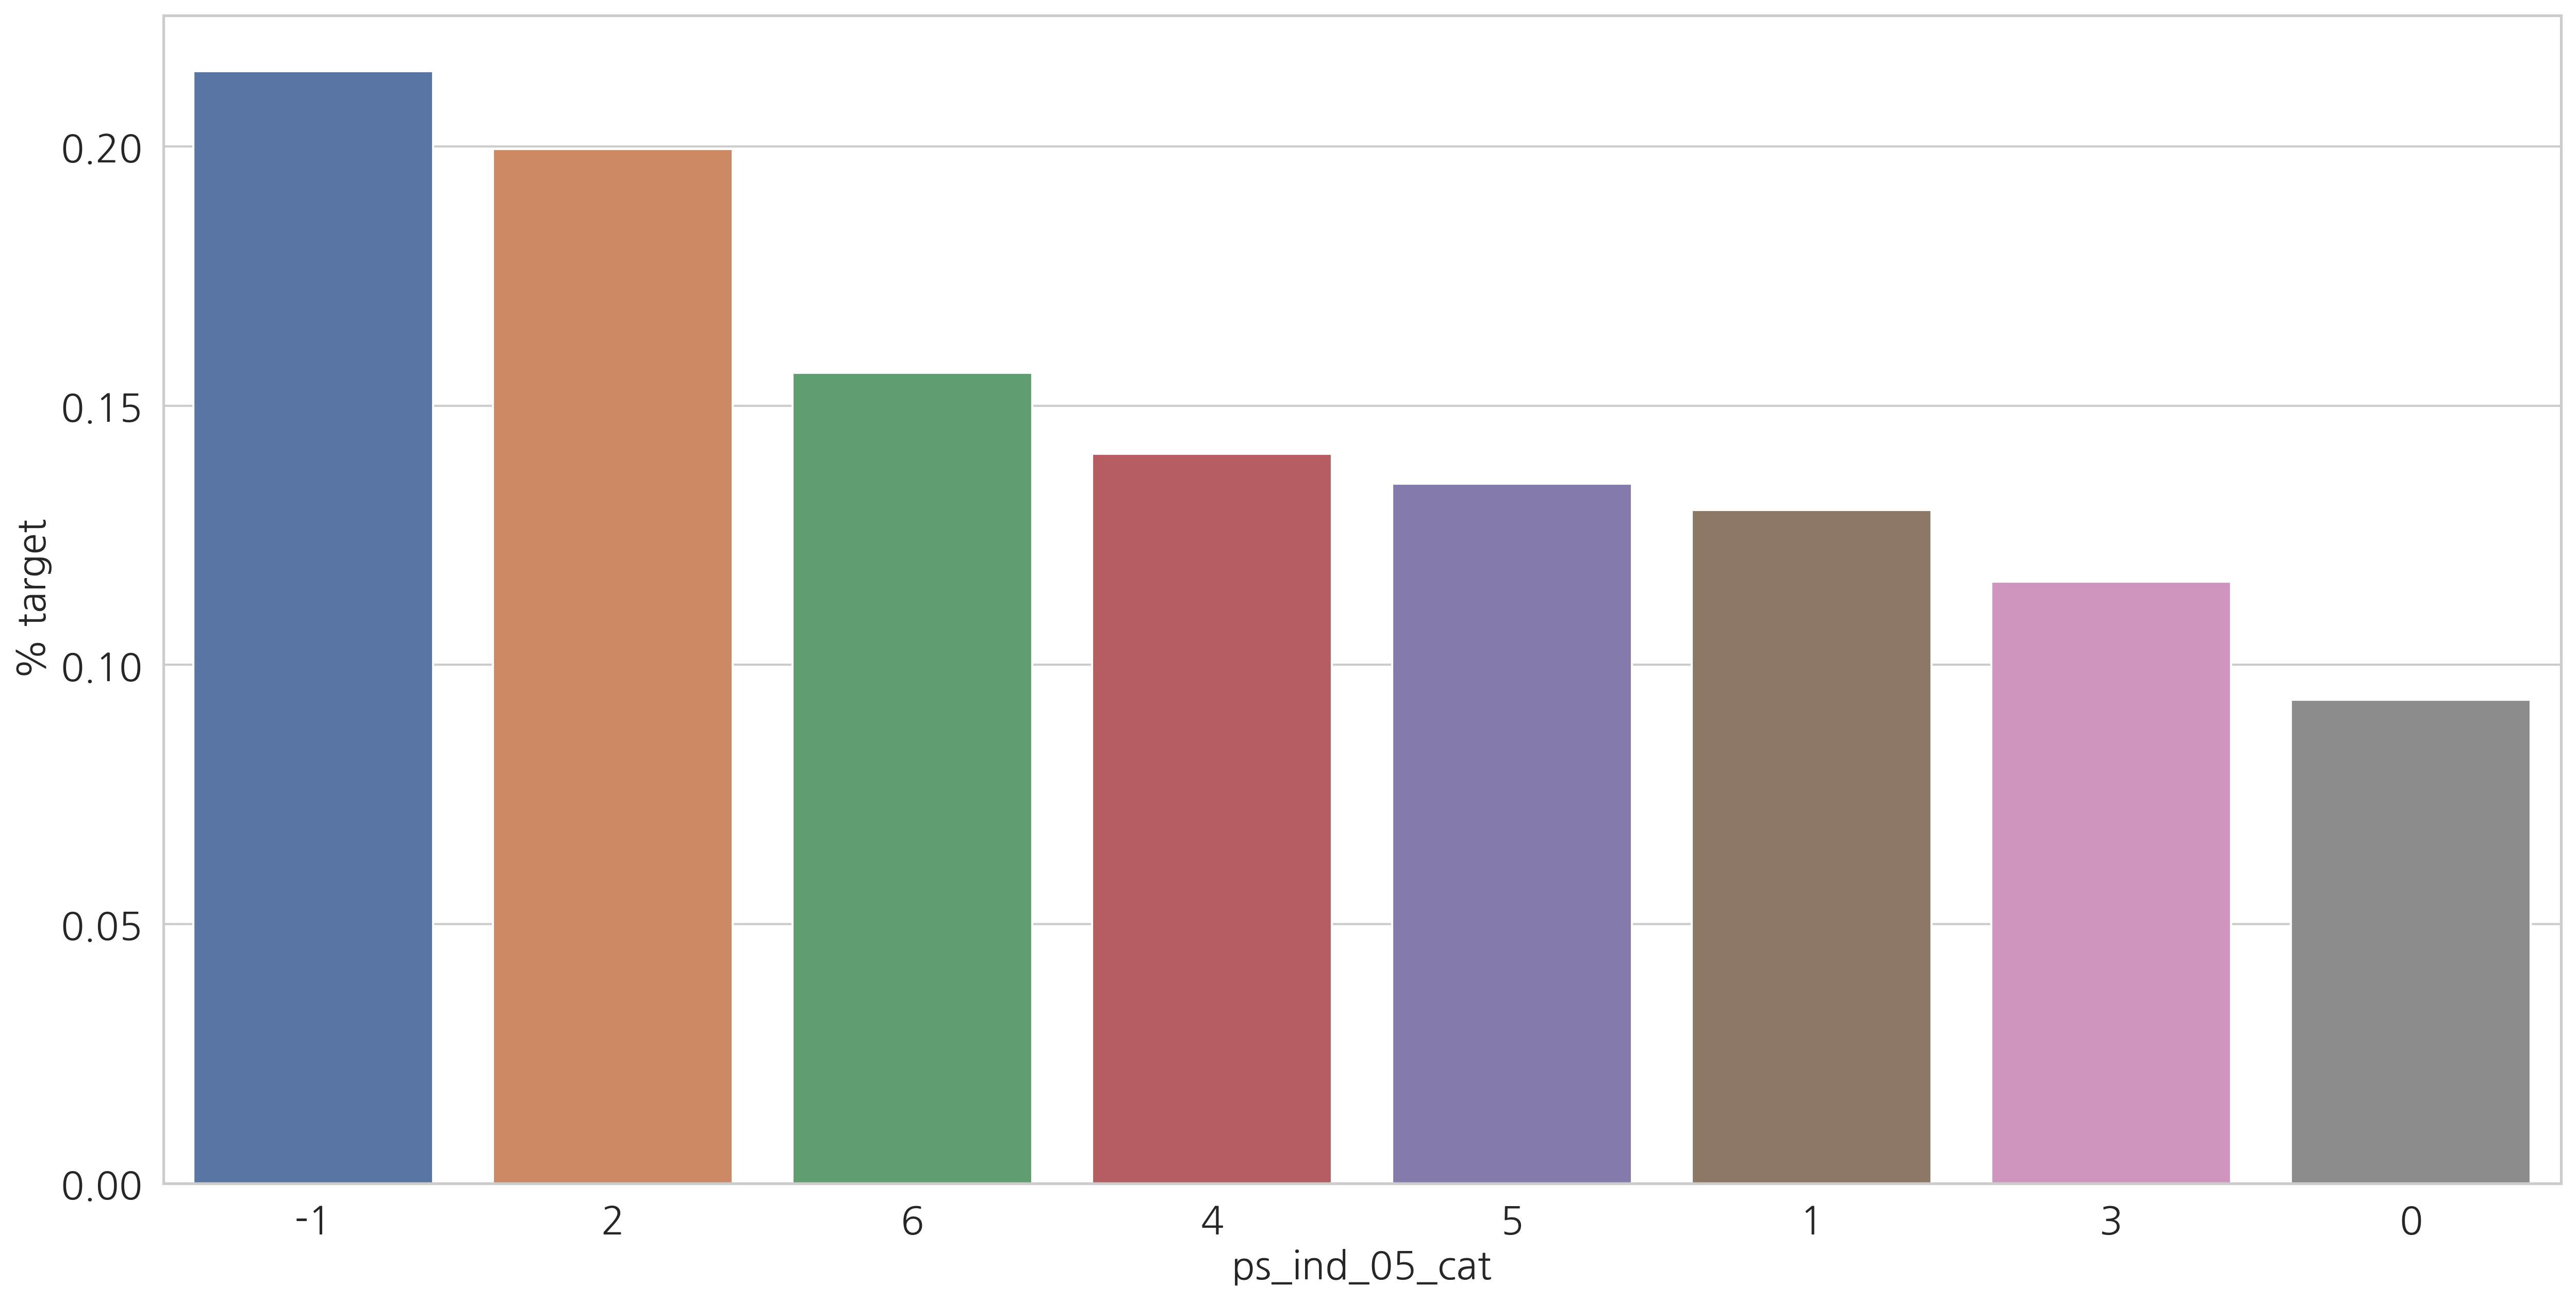

<Figure size 2400x1500 with 0 Axes>

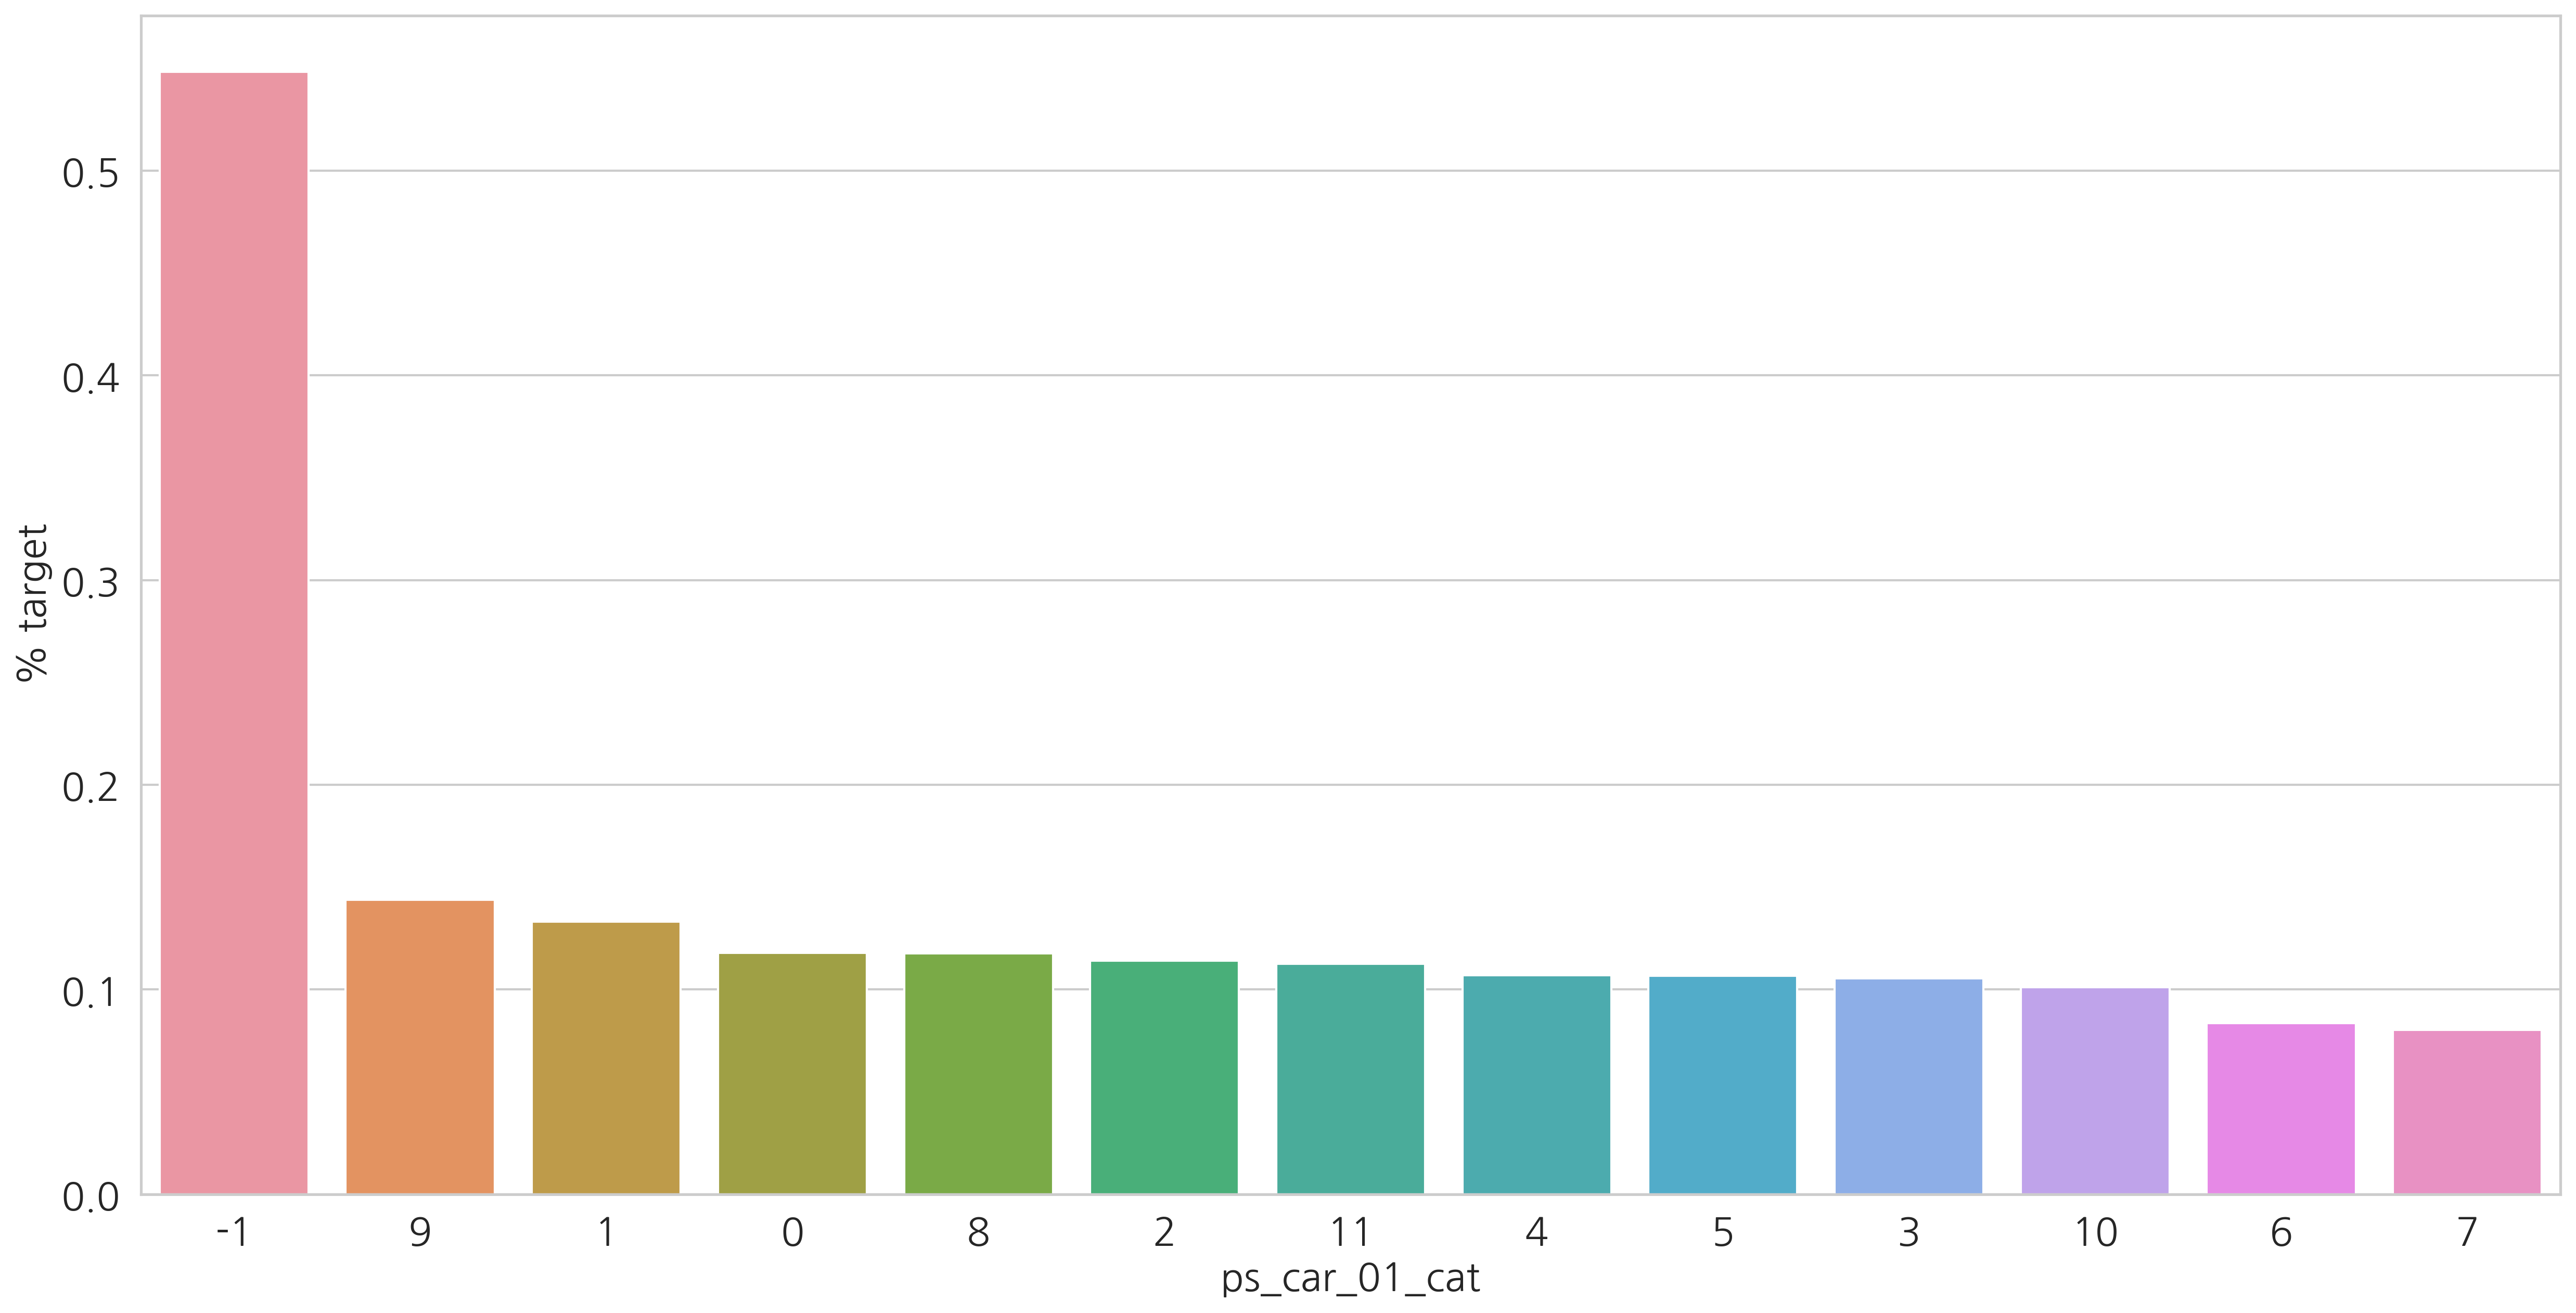

<Figure size 2400x1500 with 0 Axes>

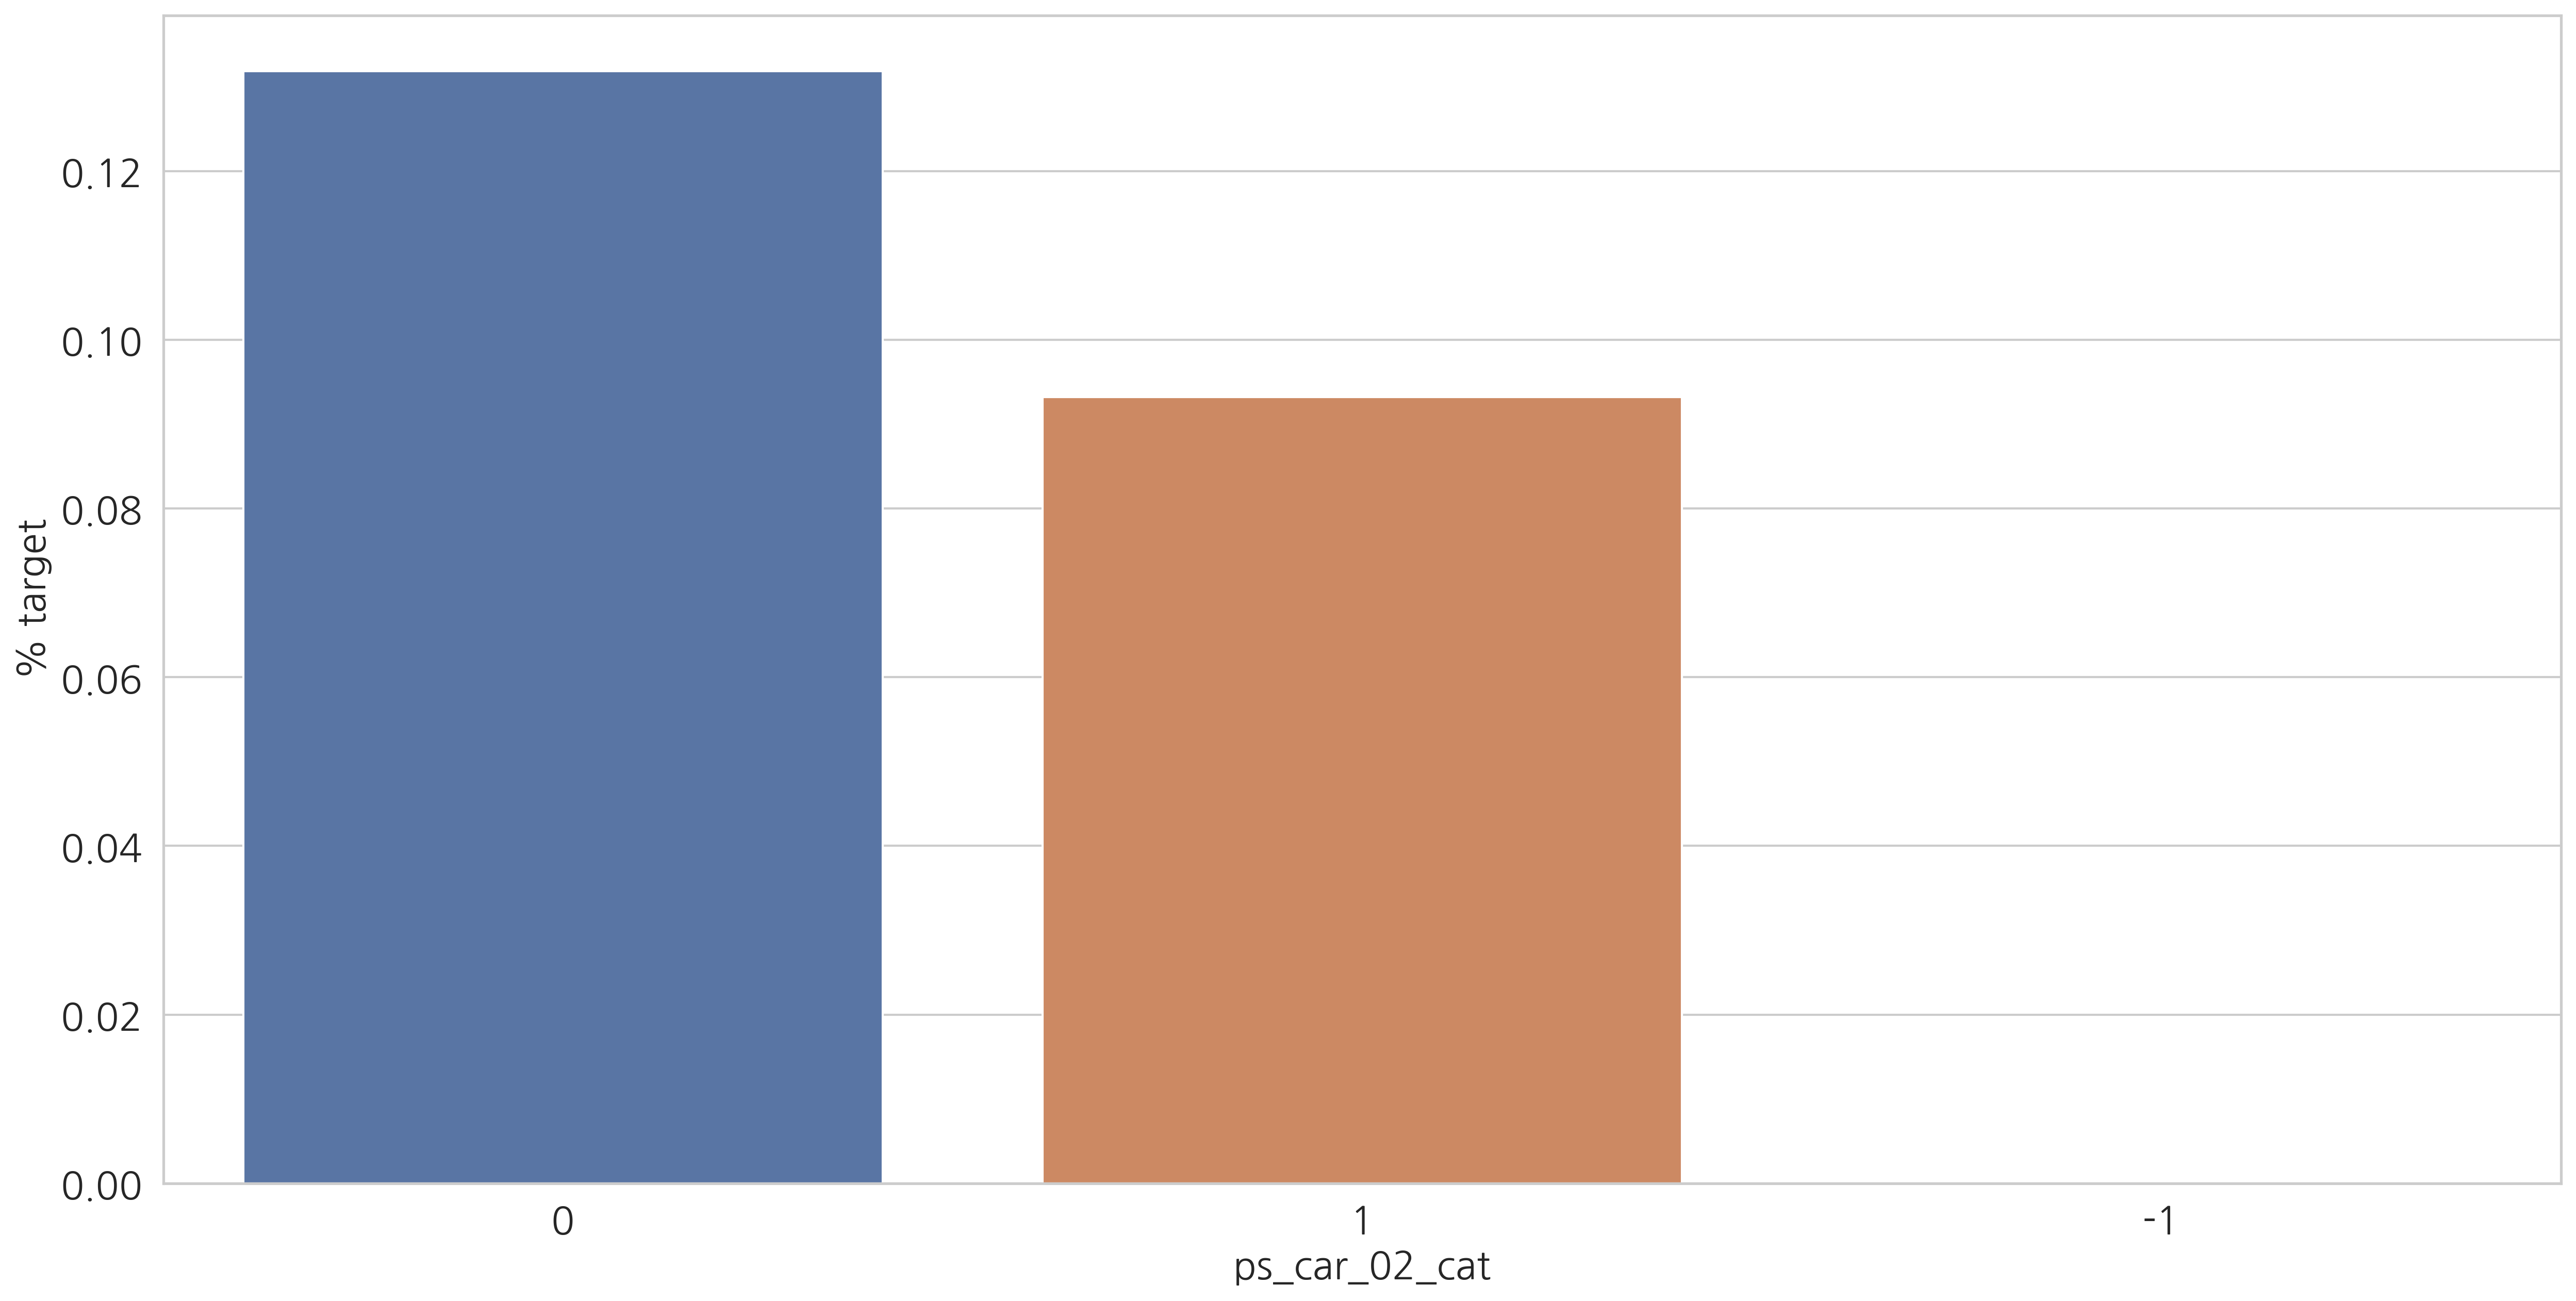

<Figure size 2400x1500 with 0 Axes>

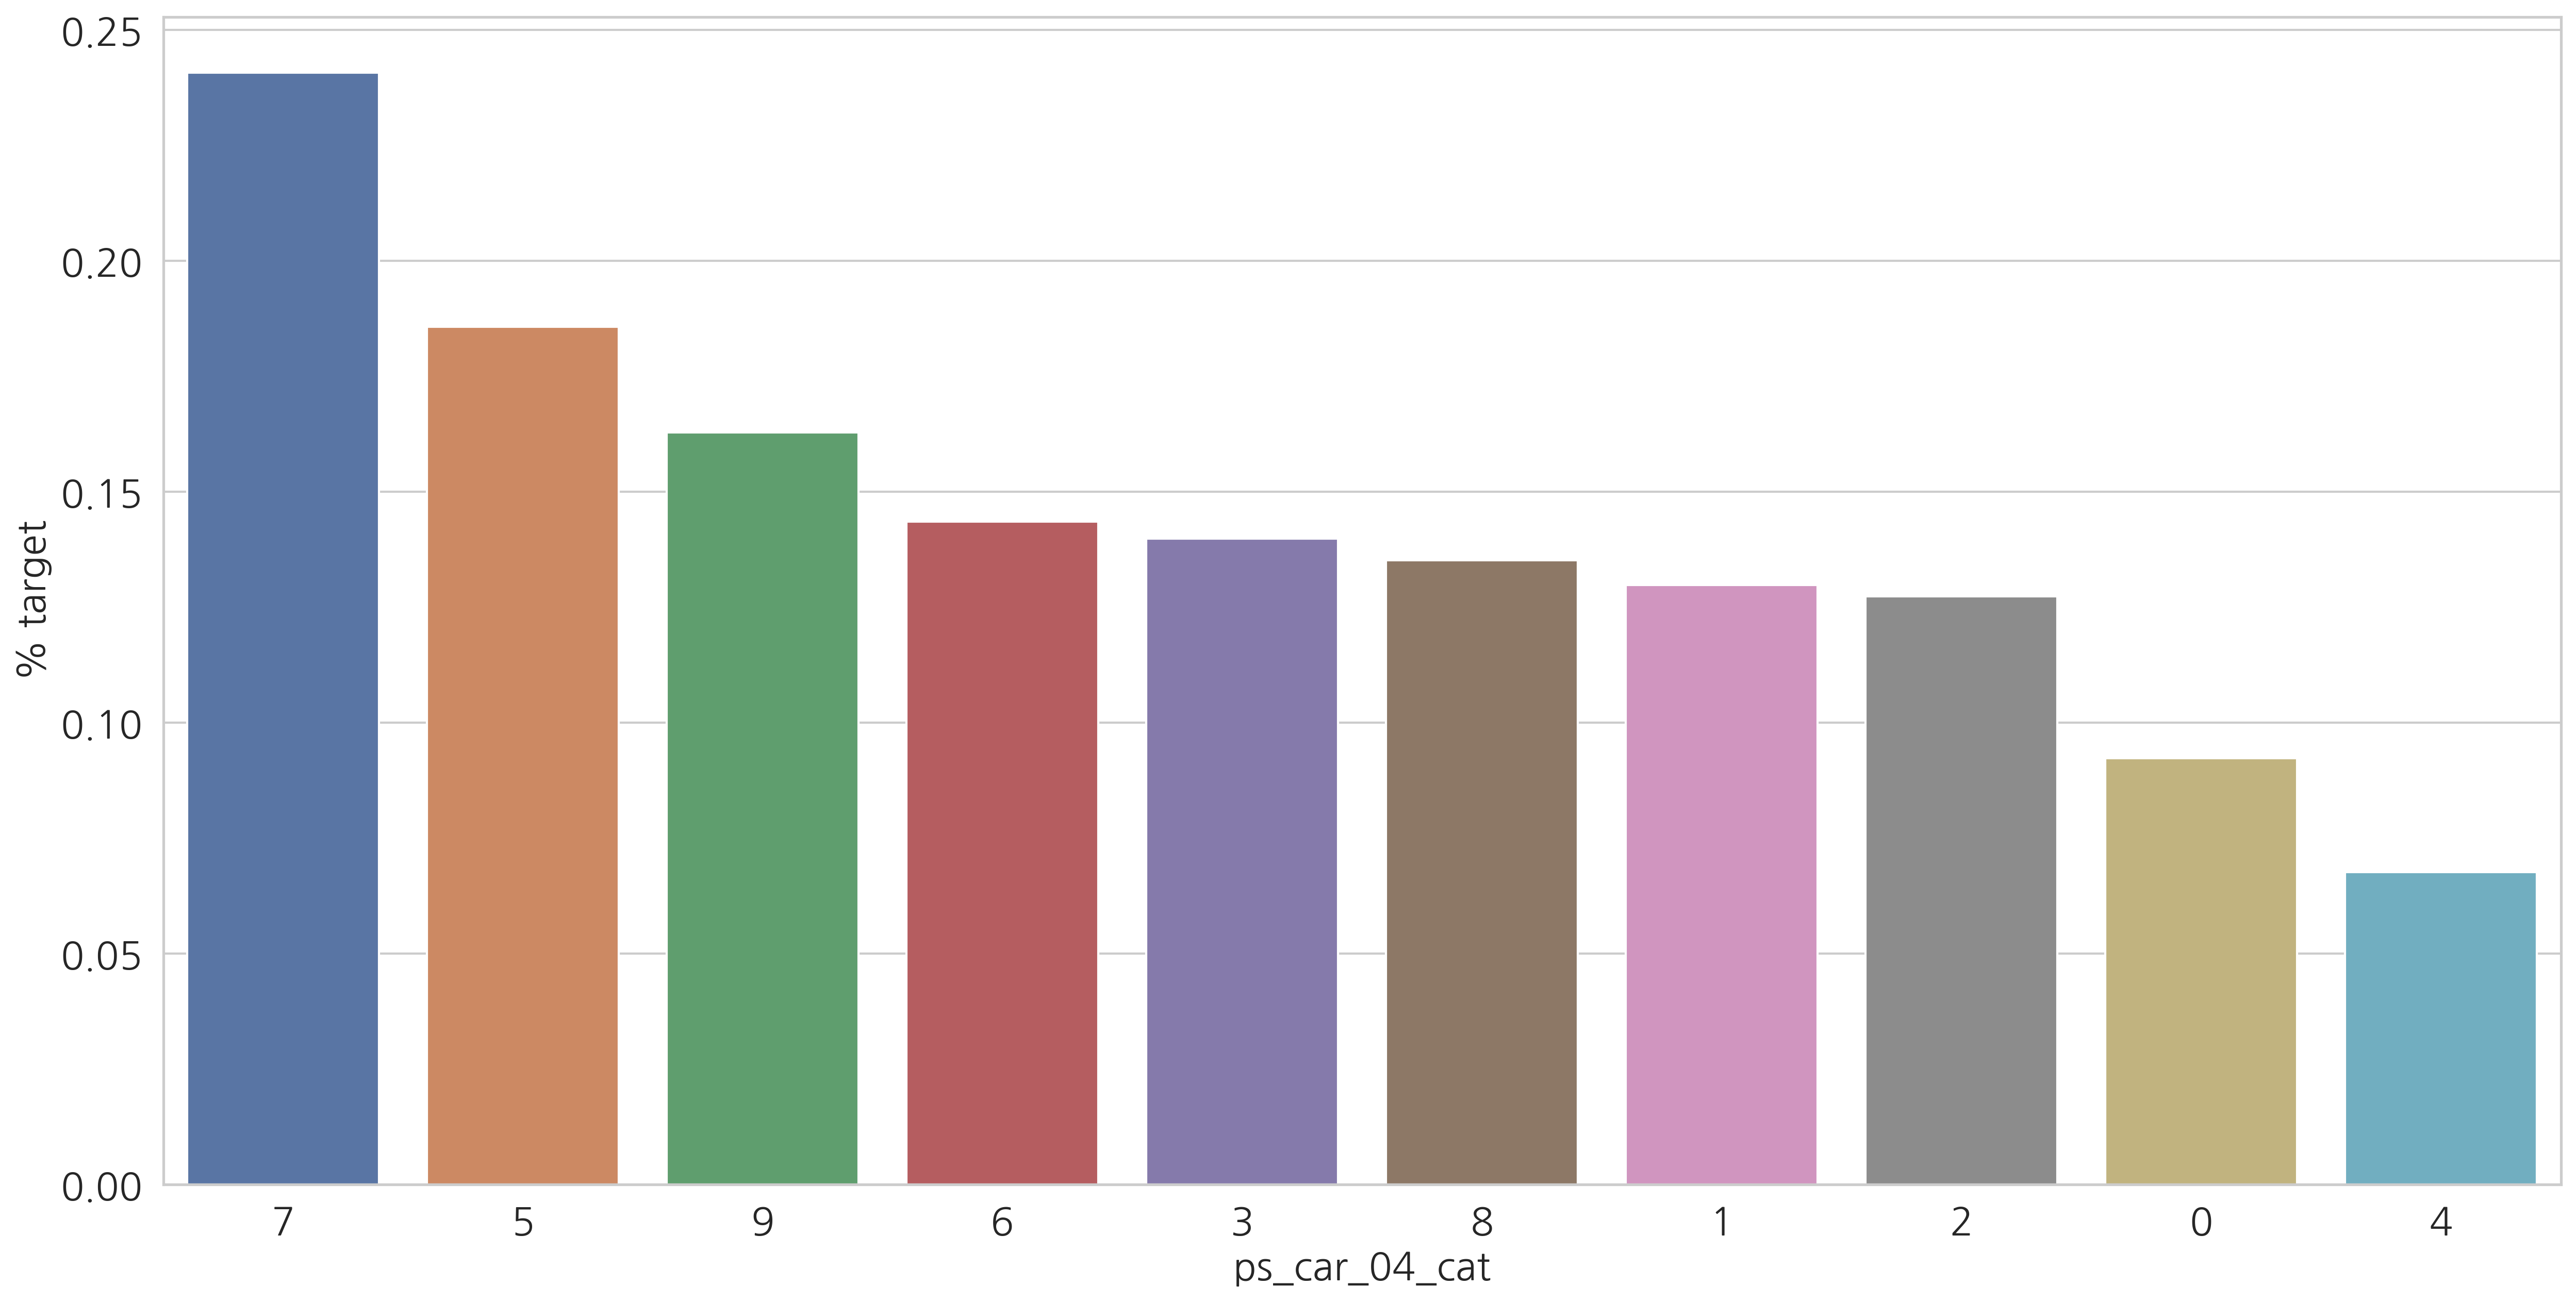

<Figure size 2400x1500 with 0 Axes>

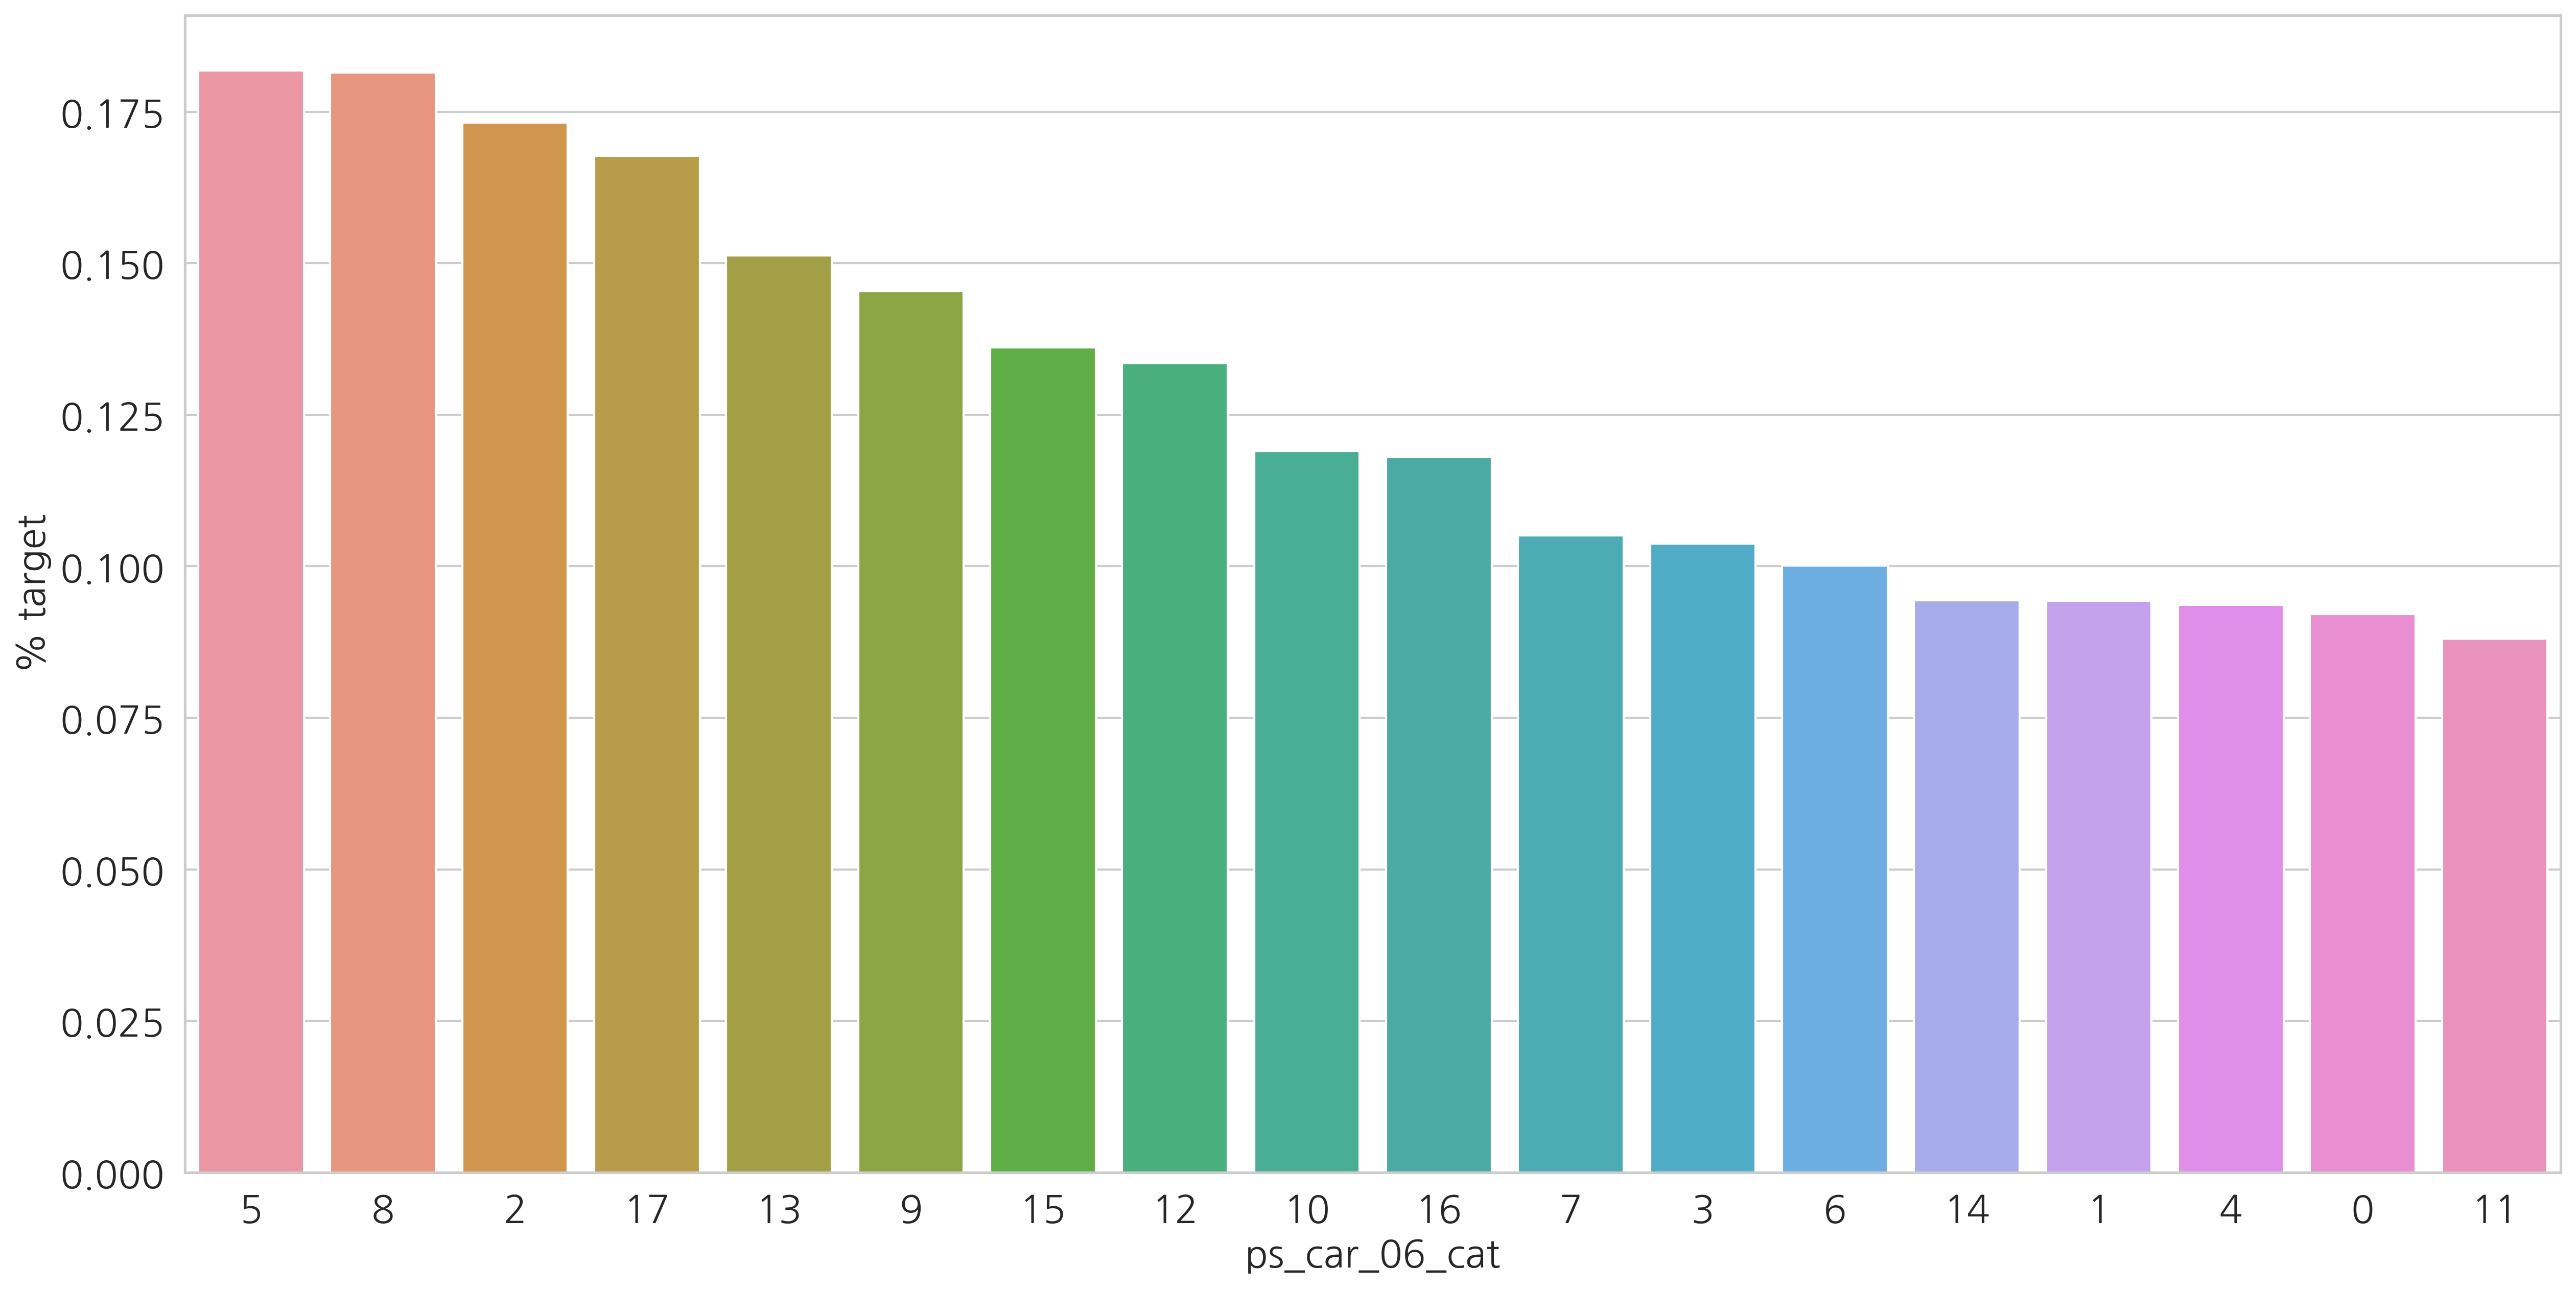

<Figure size 2400x1500 with 0 Axes>

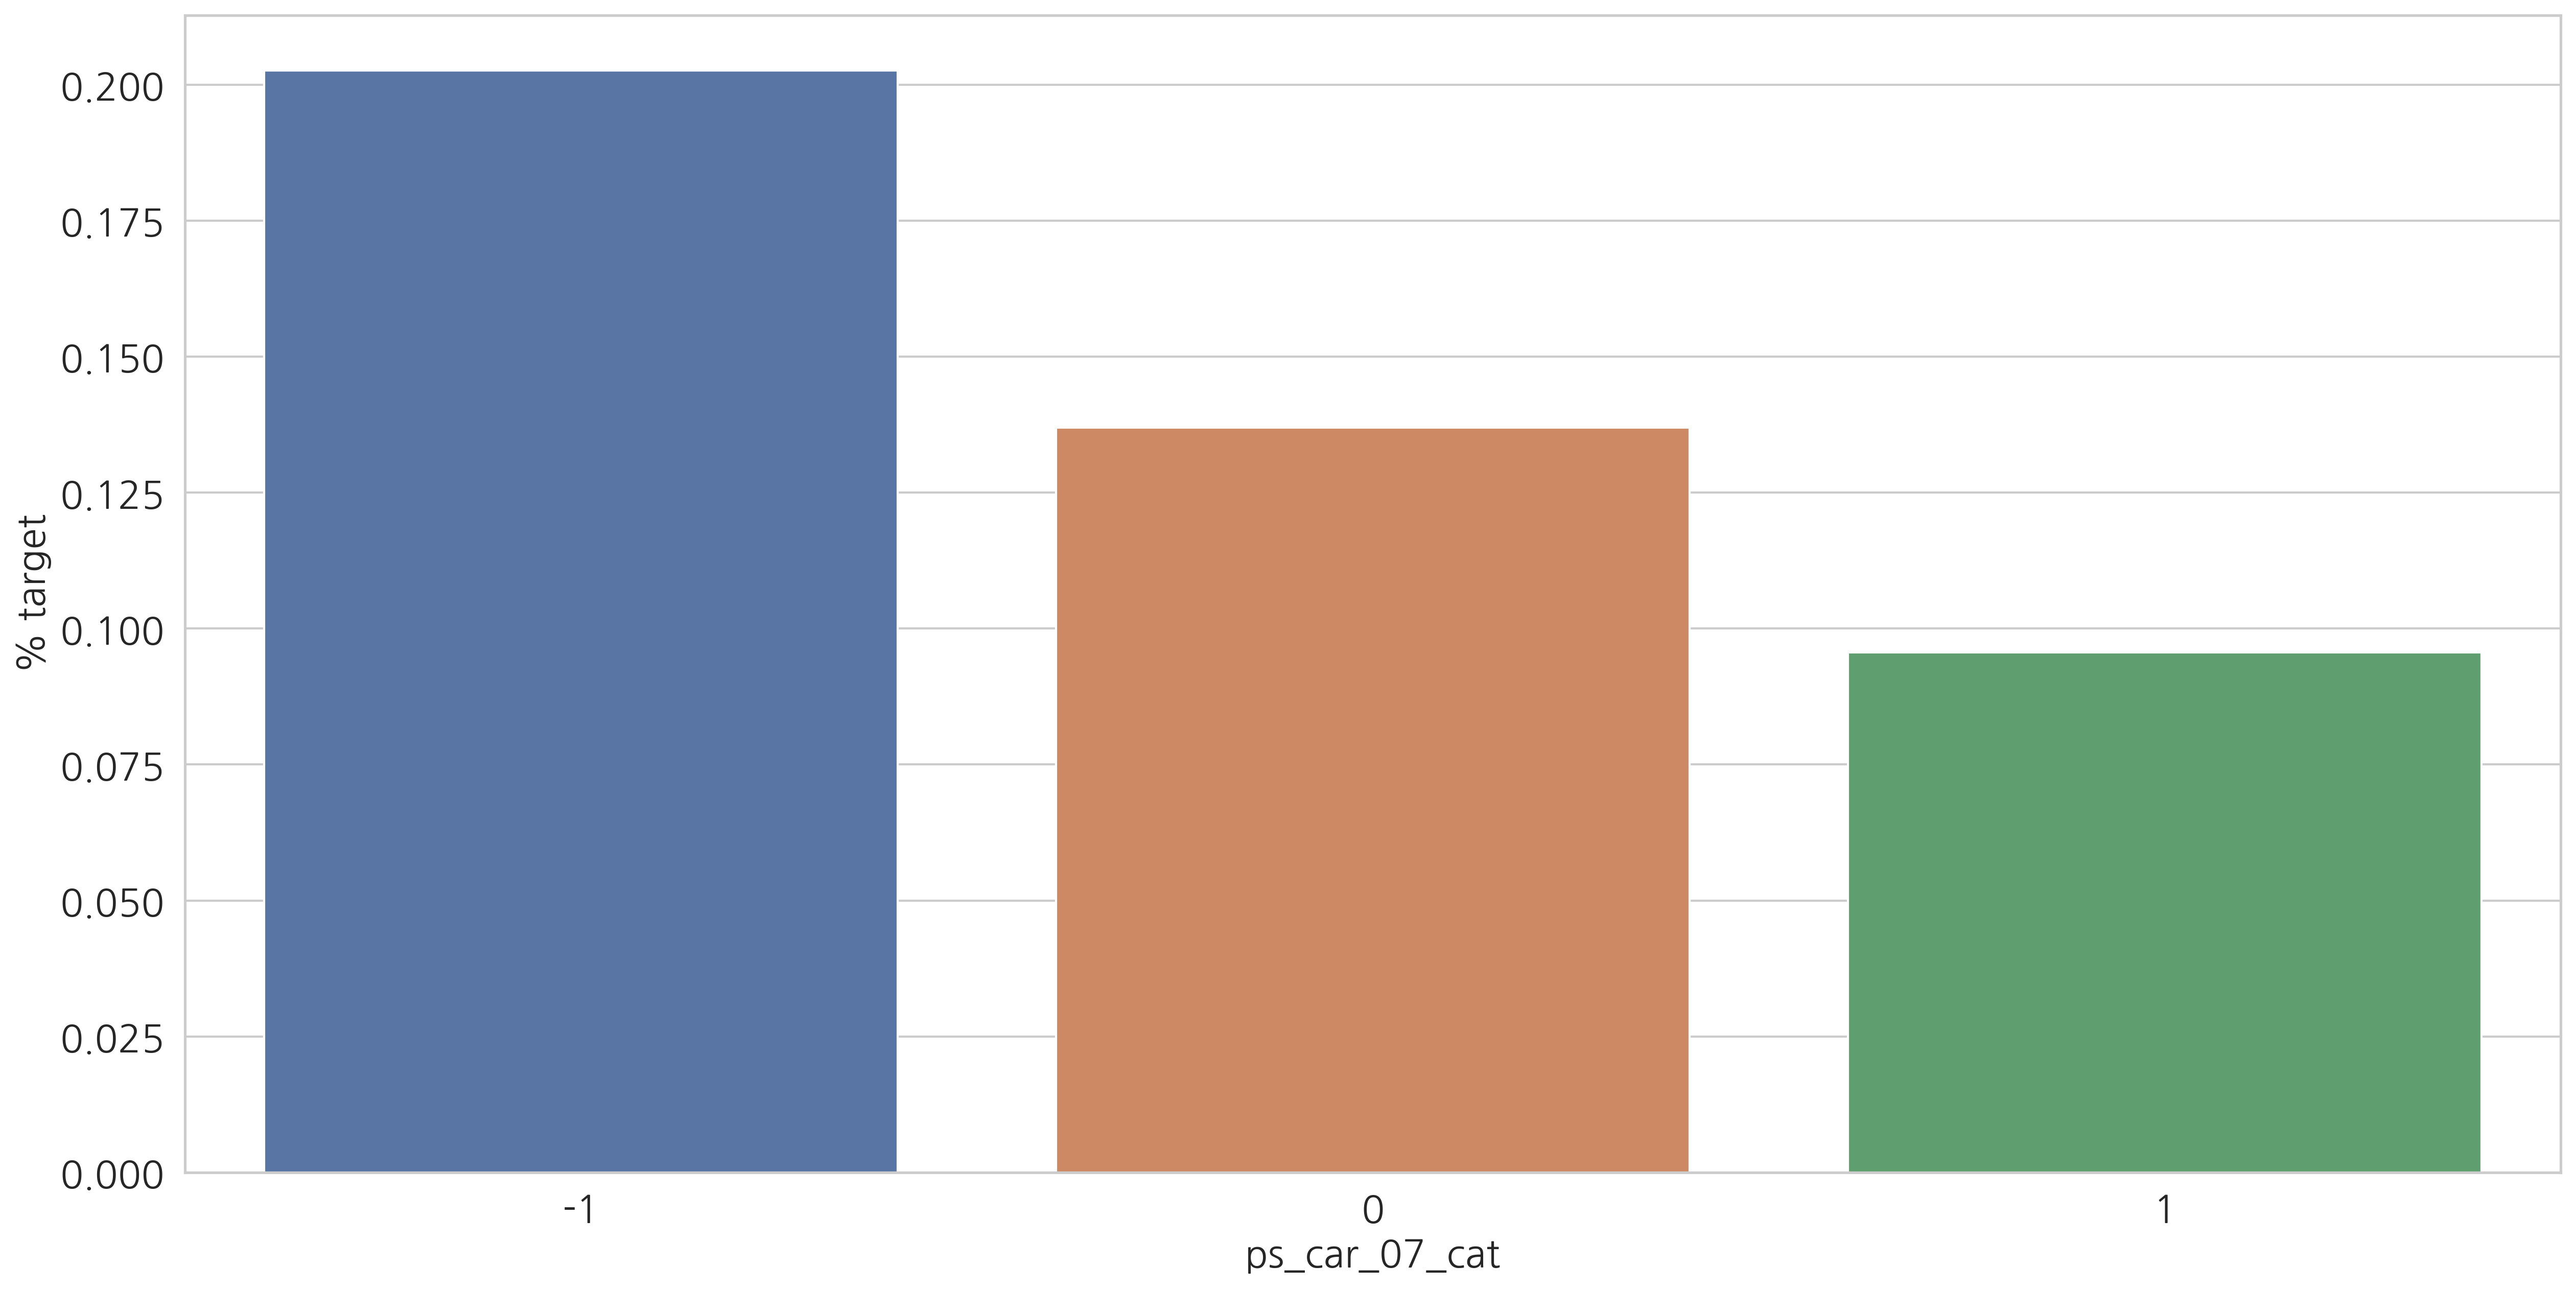

<Figure size 2400x1500 with 0 Axes>

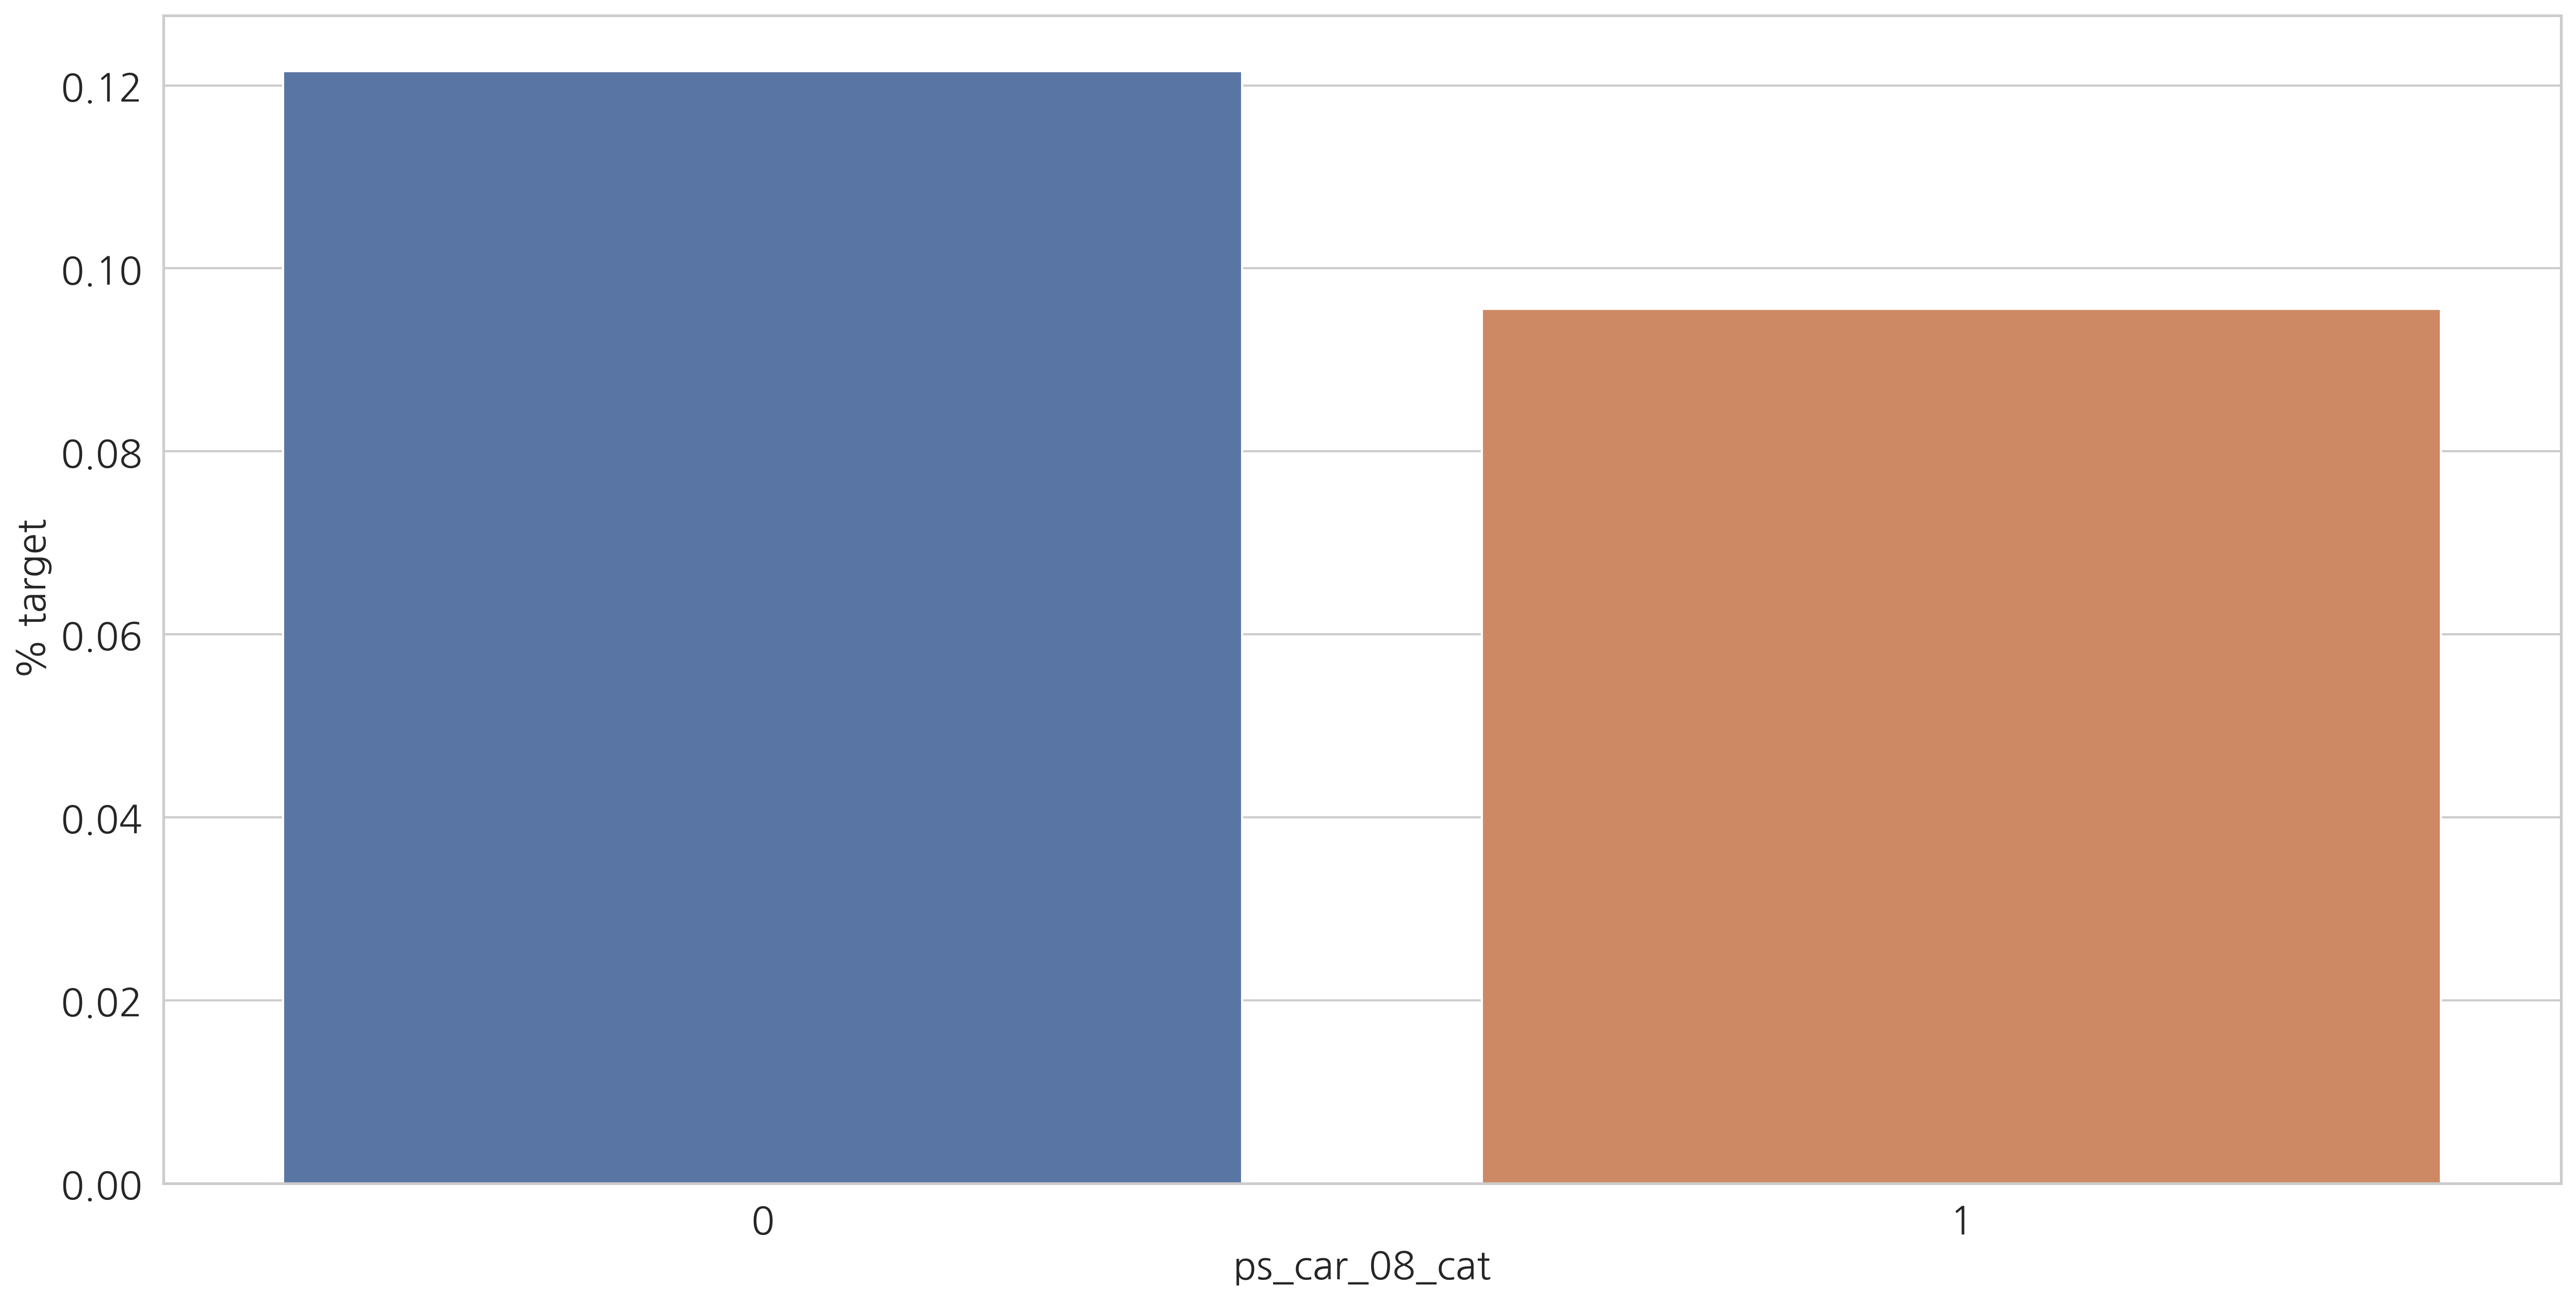

<Figure size 2400x1500 with 0 Axes>

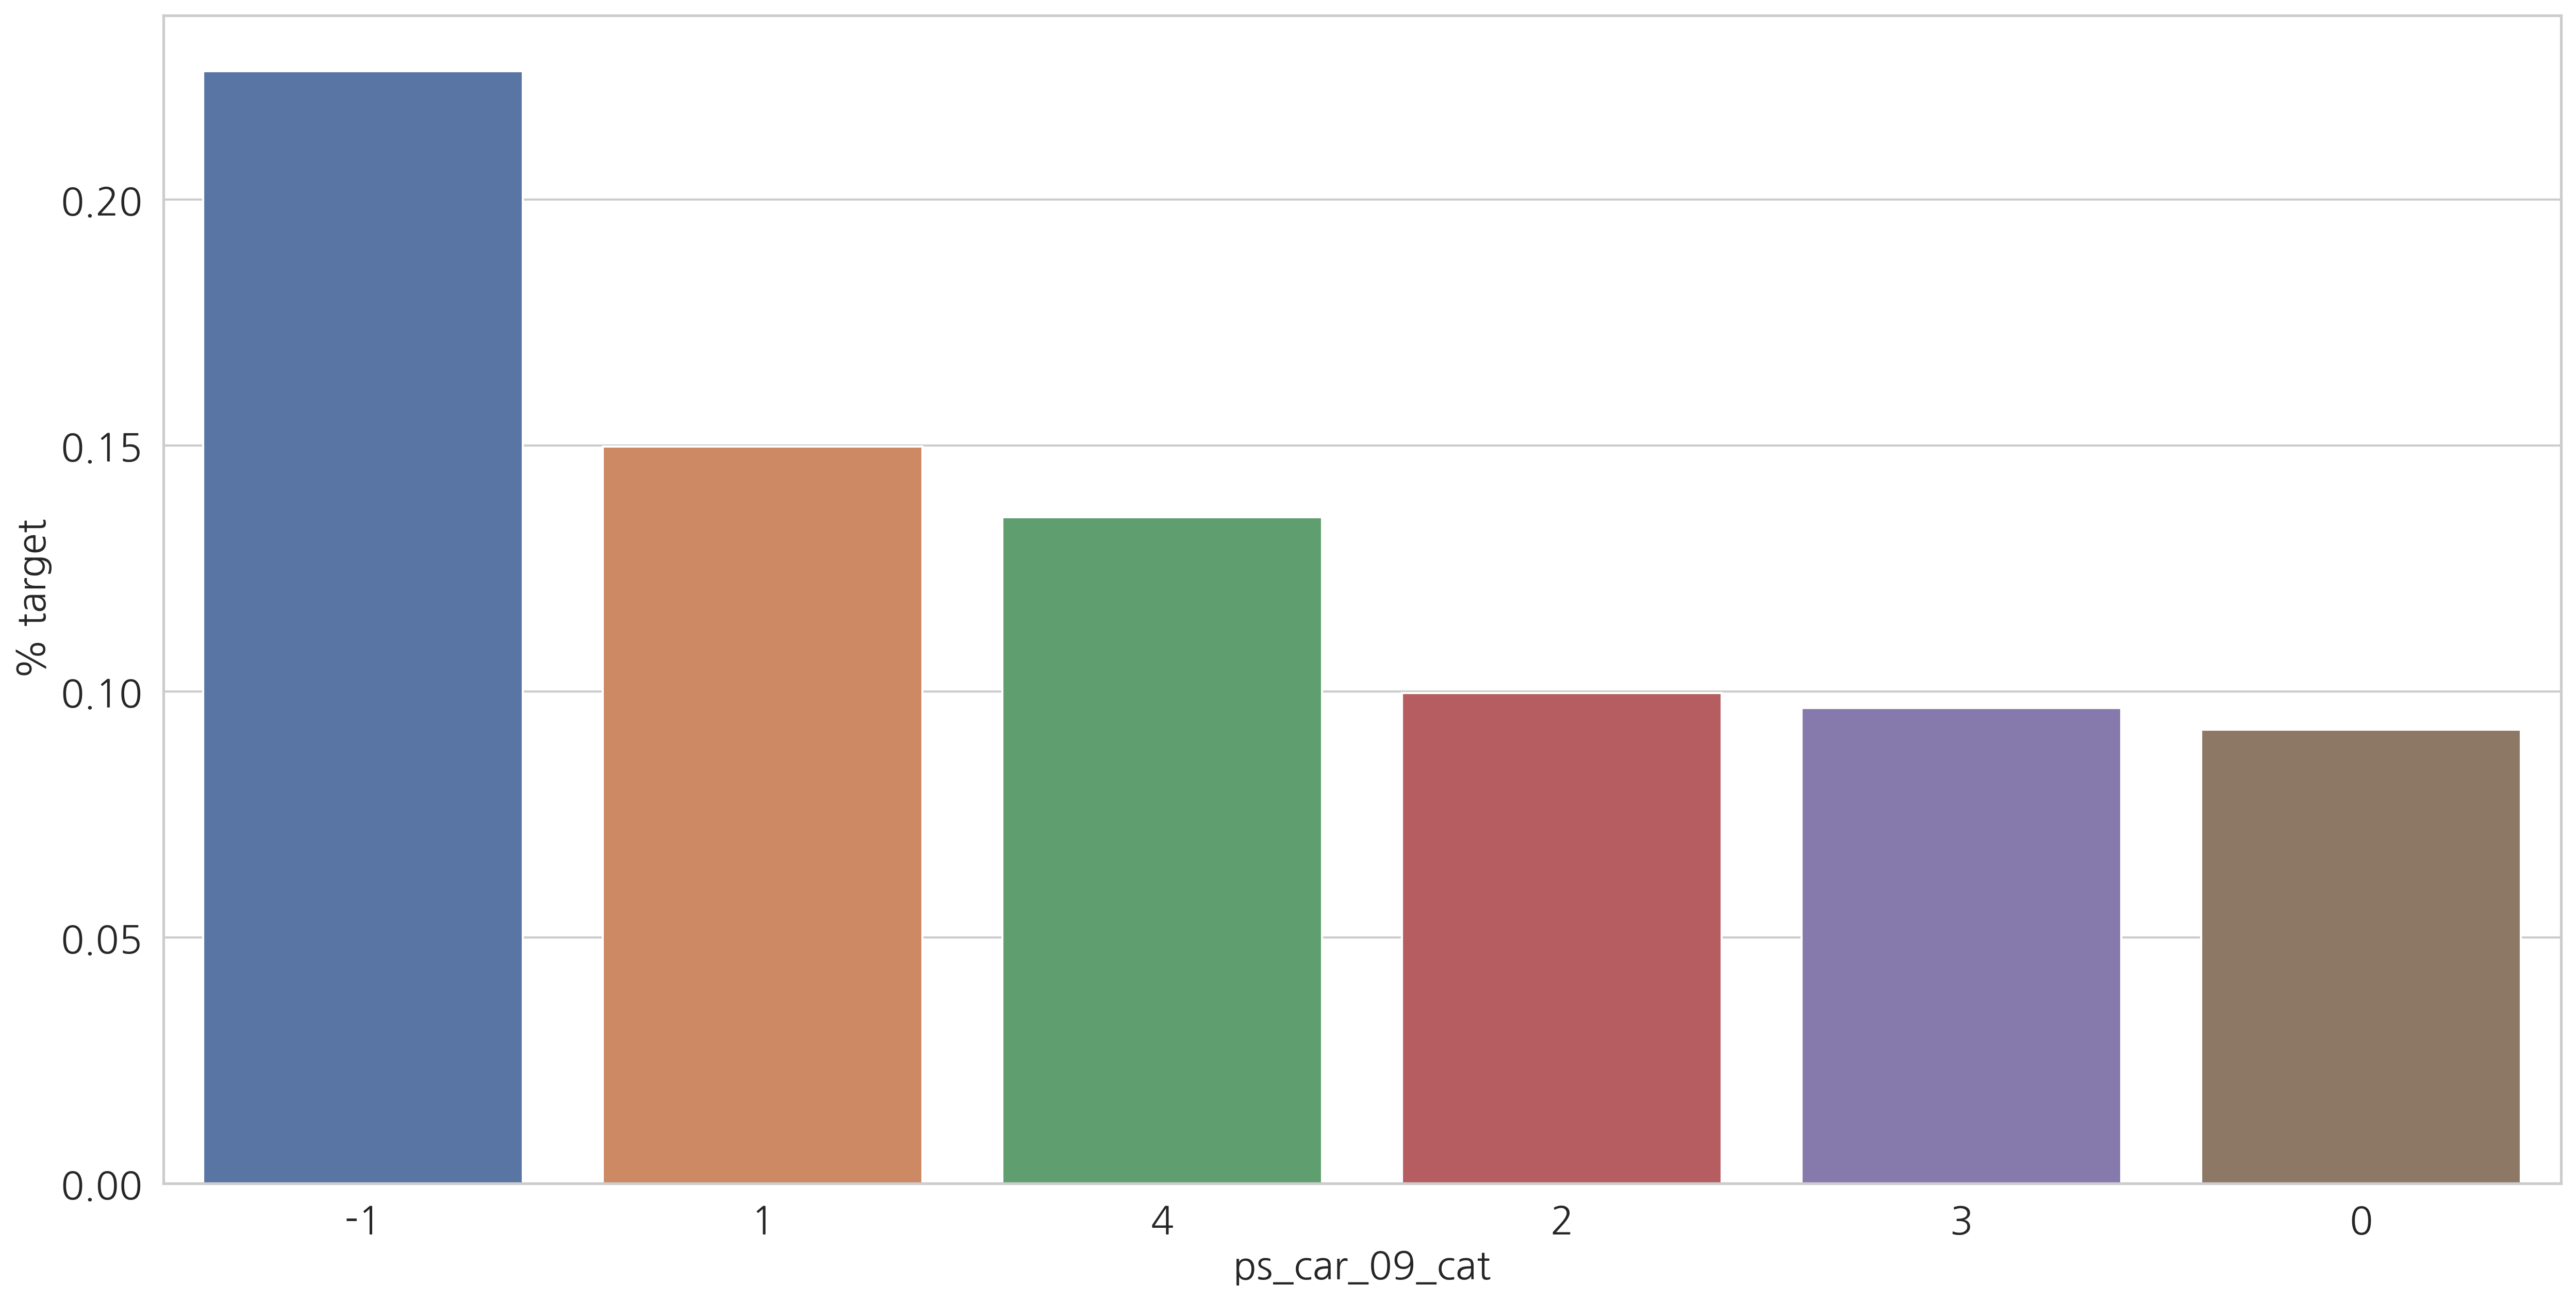

<Figure size 2400x1500 with 0 Axes>

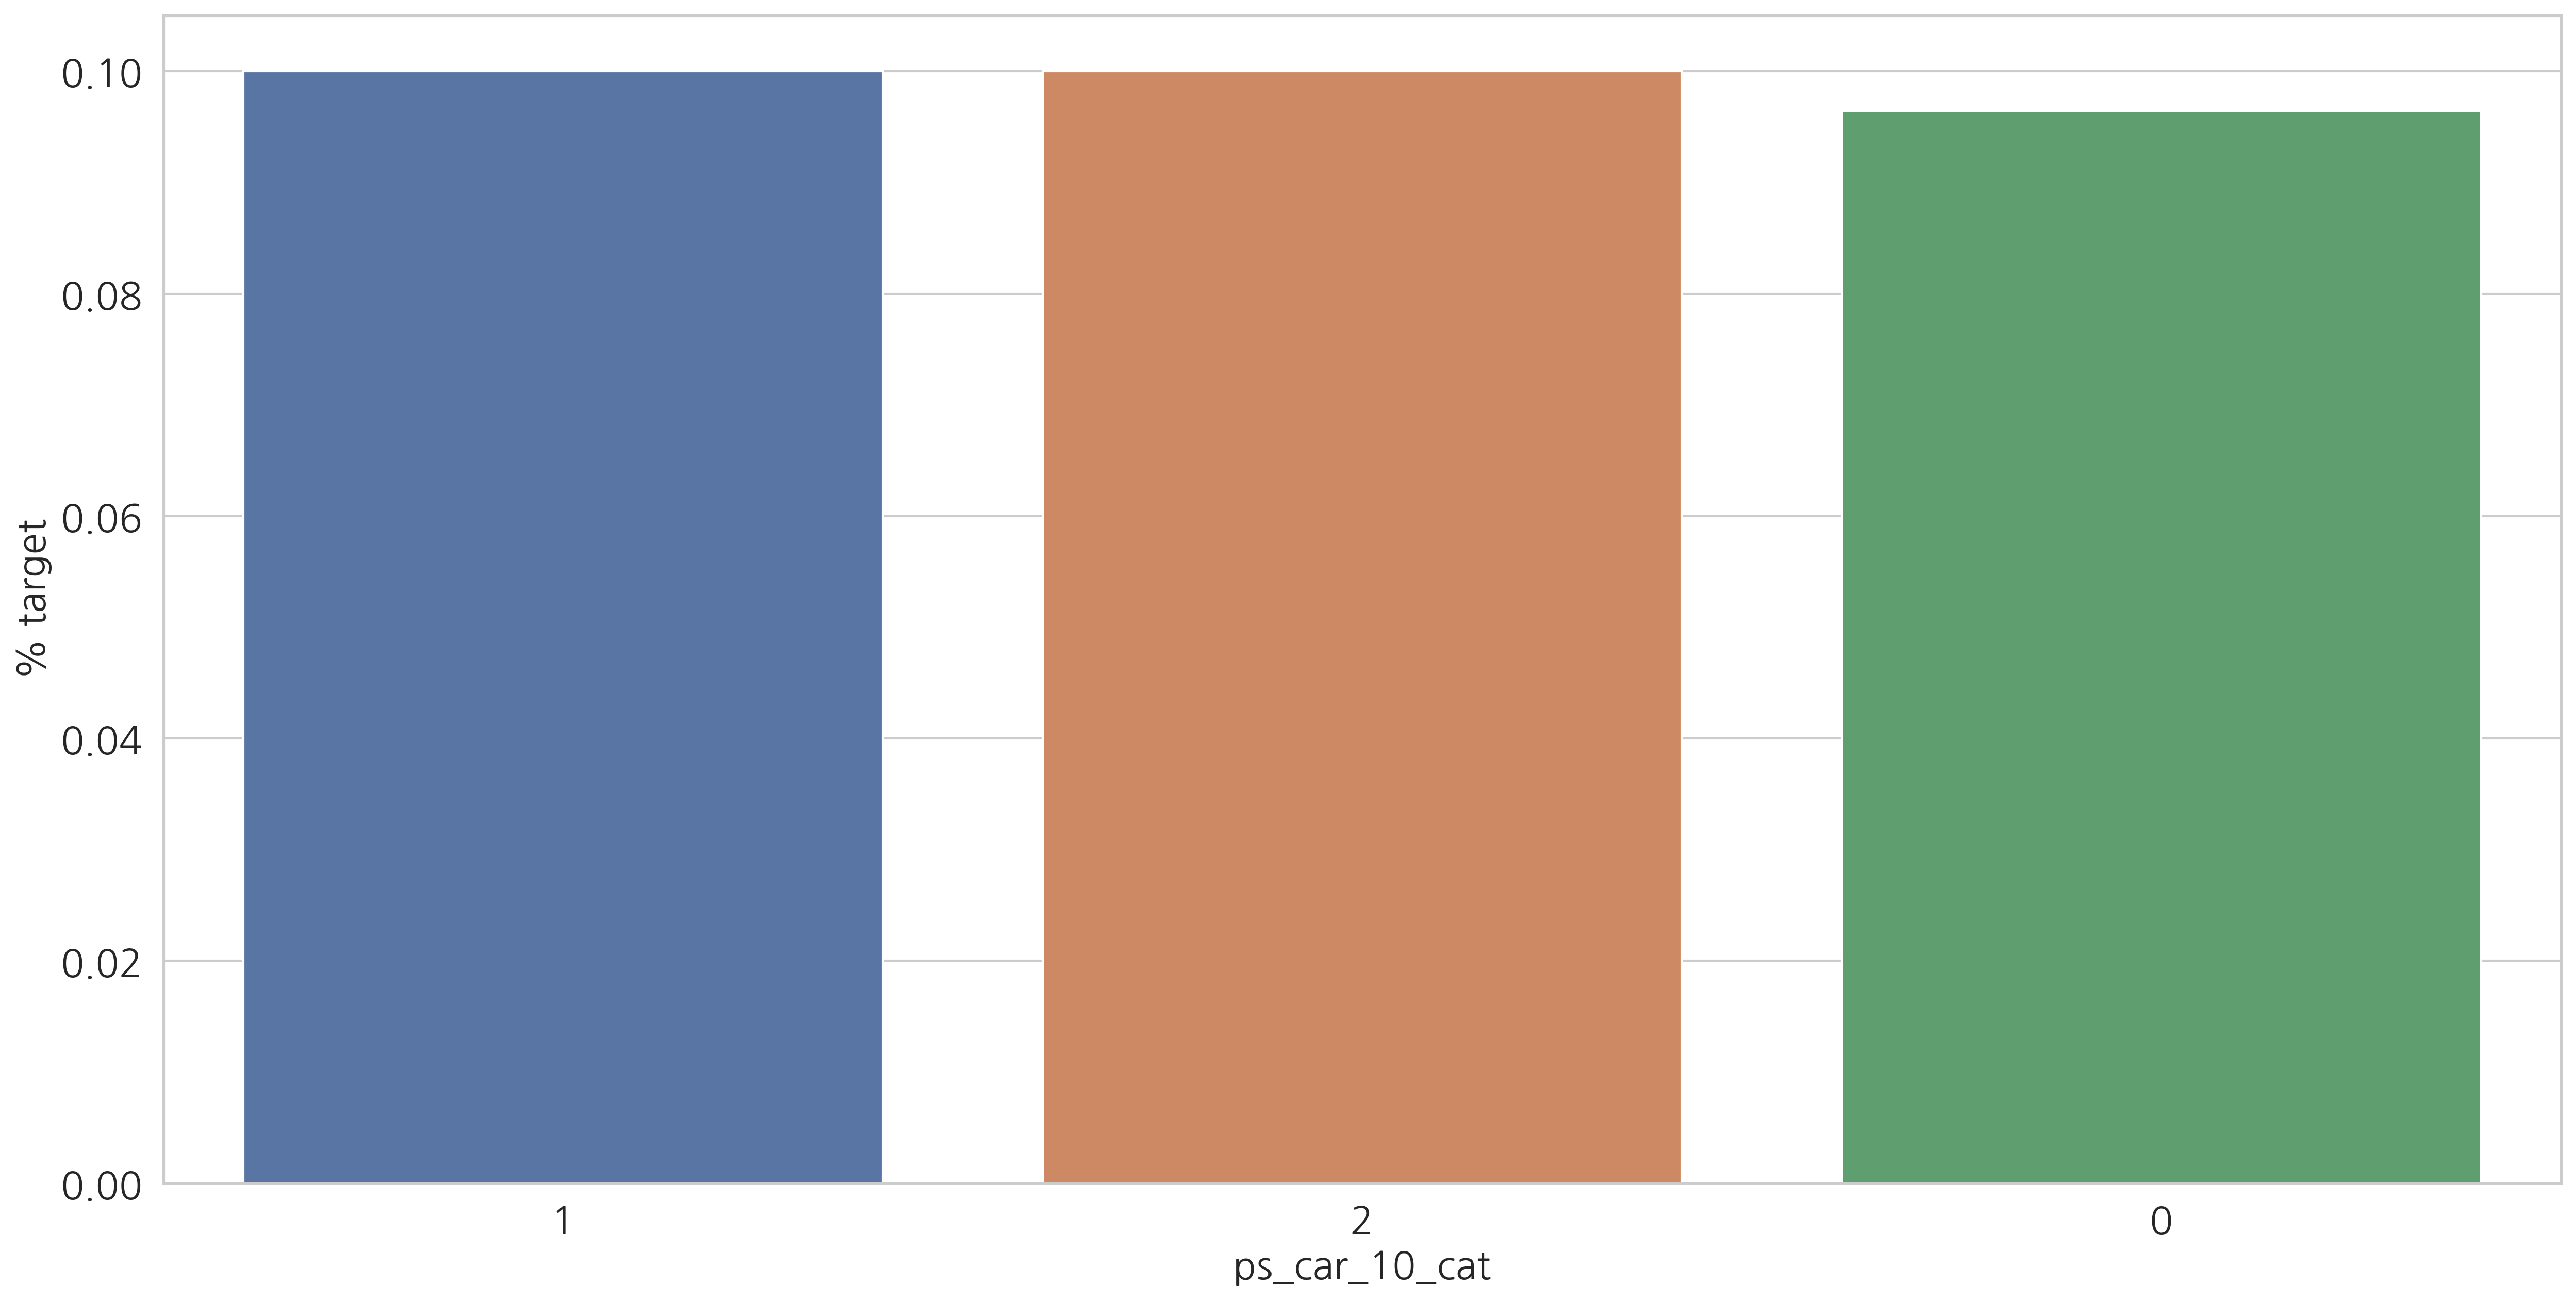

In [22]:
v = meta[(meta.level == "nominal") & (meta.keep)].index
# ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', ..., 'ps_car_10_cat']

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20, 10))
    cat_perc = train[[f, "target"]].groupby([f], as_index=False).mean()
    cat_perc.sort_values(by="target", ascending=False, inplace=True)
    
    # Barplot
    sns.barplot(ax=ax, x=f, y="target", data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis="both", which="major", labelsize=18)
    plt.show()

결측값이 있는 변수에서 알 수 있듯이 결측값을 별도의 범주 값으로 유지하는 것이 좋습니다. (최빈값으로 대체하는 것 대신에)

결측치에 해당하는 고객들은 더 많은 보험 청구를 하는 경향이 있습니다.

## Interval variables

heatmap을 통해 상관관계를 알아봅시다.

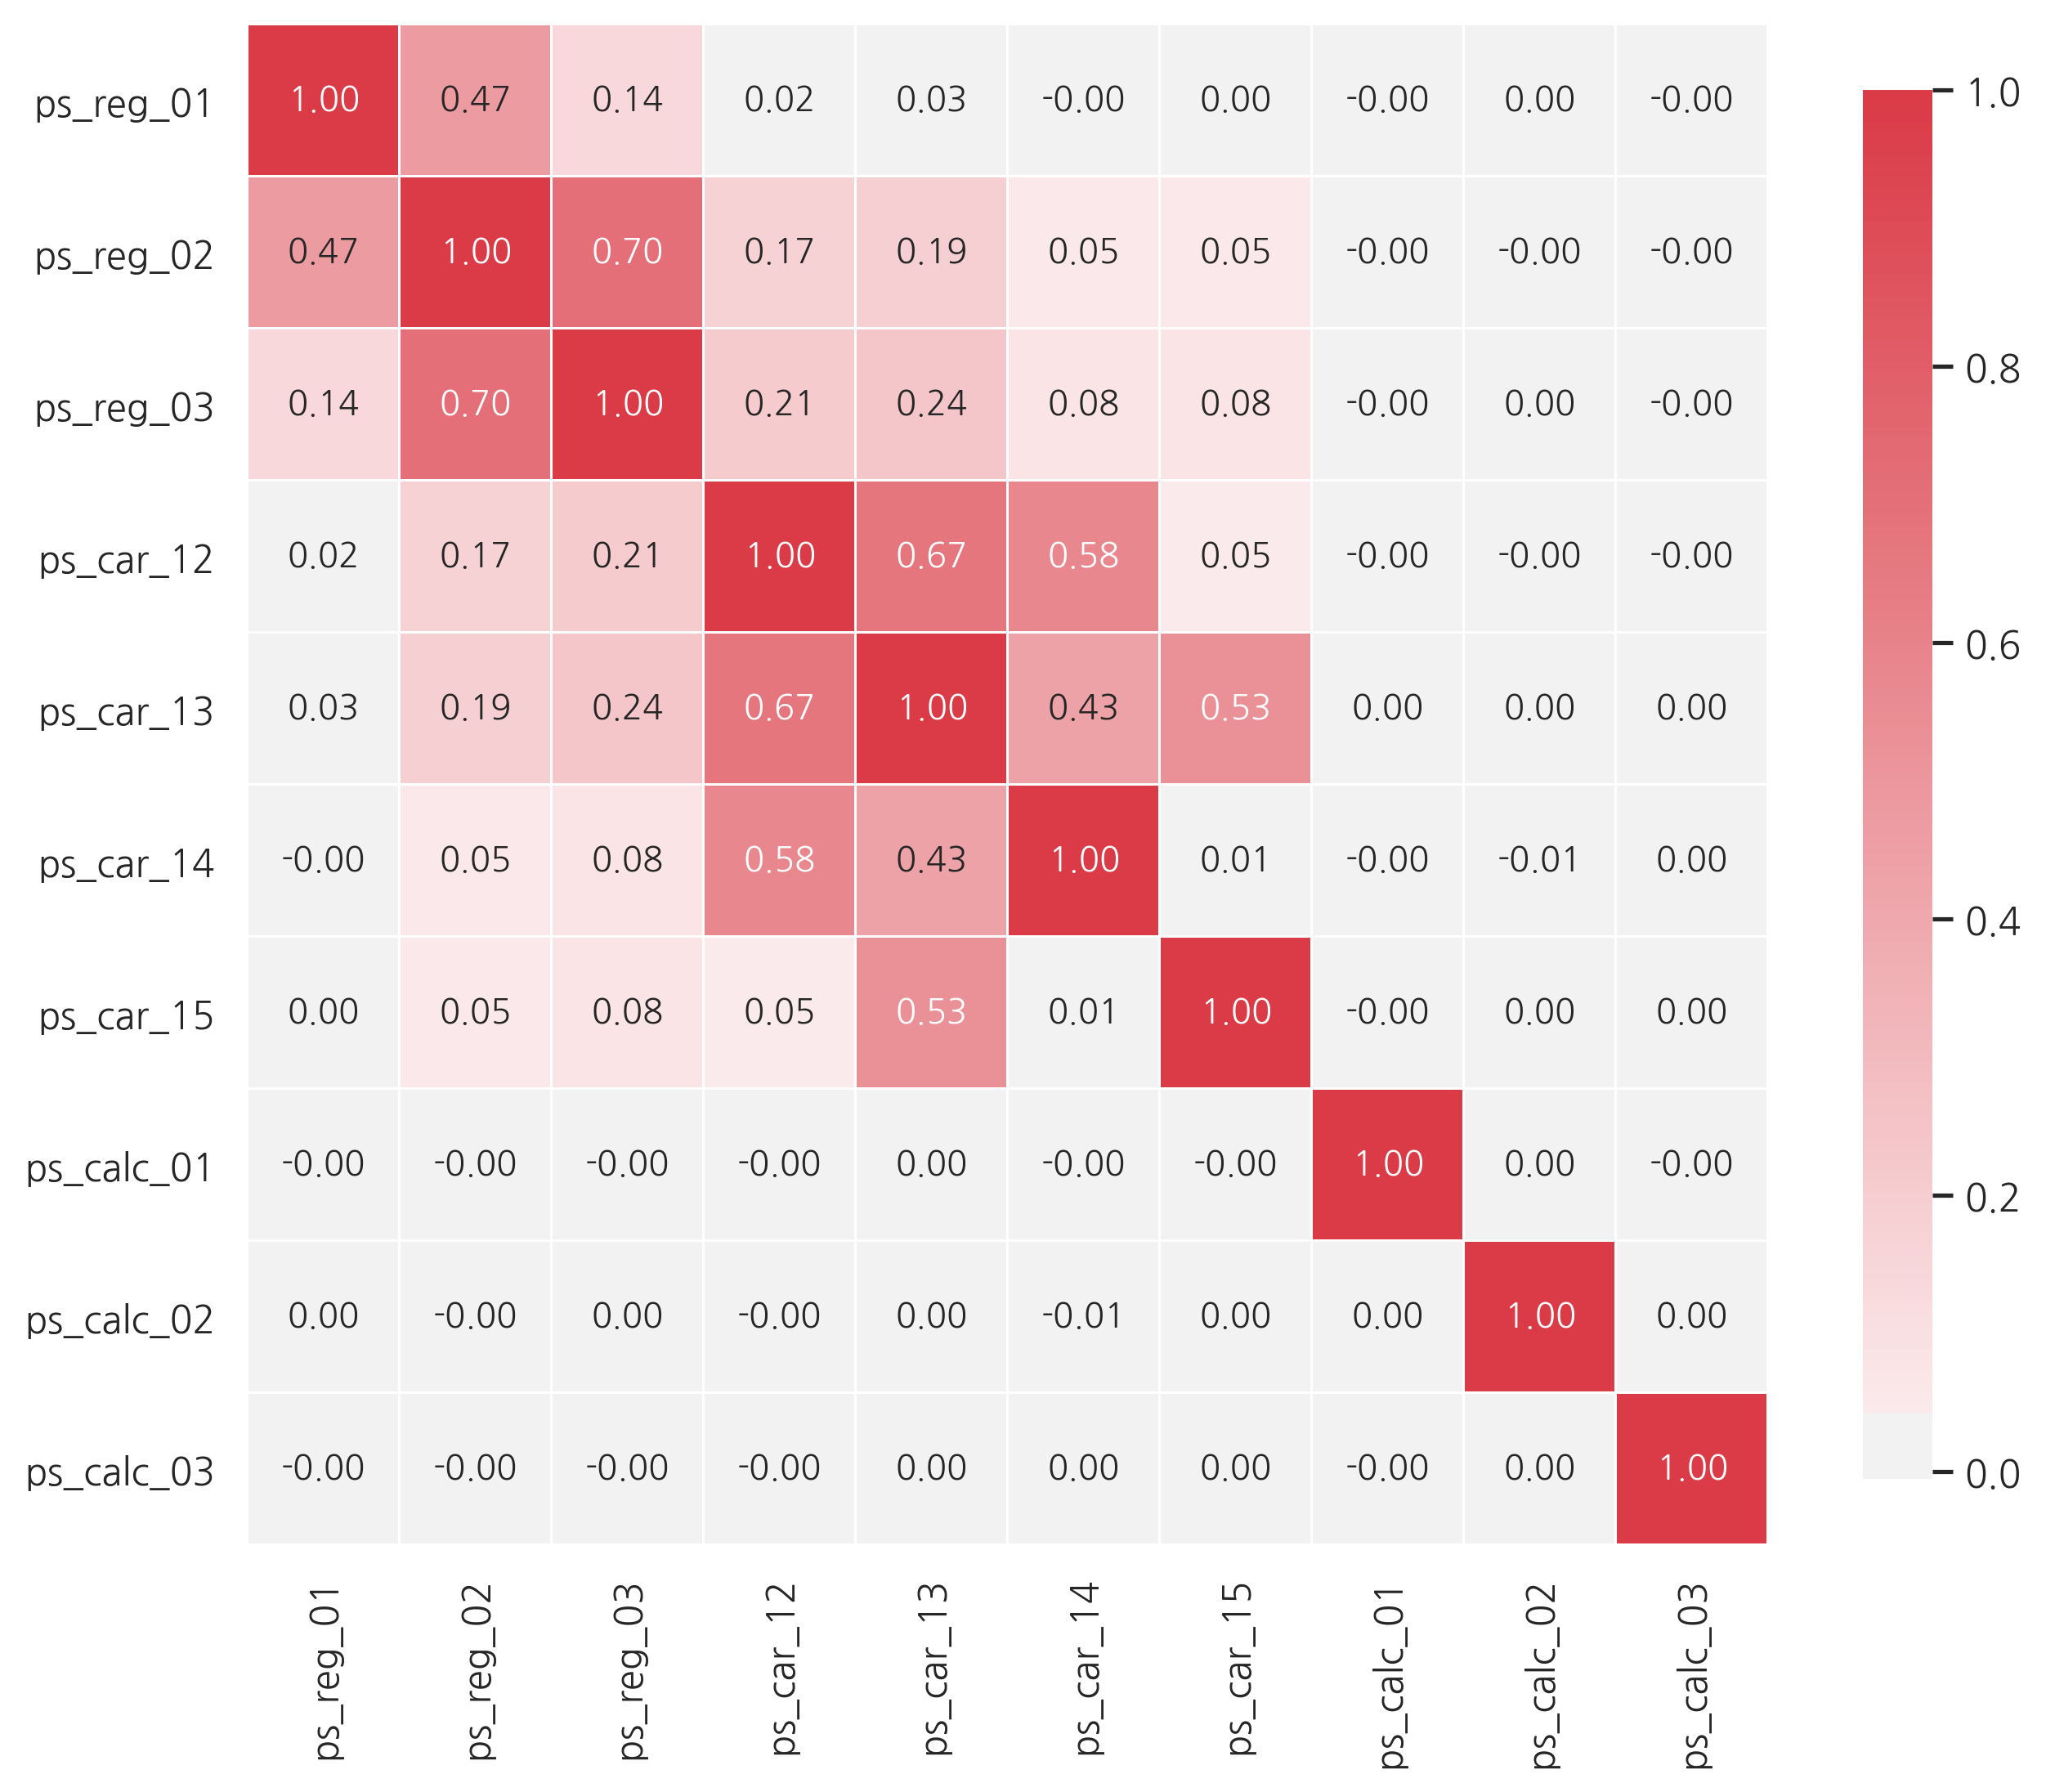

In [23]:
def corr_heatmap(v):
    correlations = train[v].corr()
    
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt=".2f",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show()
    
v = meta[(meta.level == "interval") & (meta.keep)].index
corr_heatmap(v)

강한 상관관계를 갖는 변수들:
- ps_reg_02 and ps_reg_03 (0.7)
- ps_car_12 and ps_car13 (0.67)
- ps_car_12 and ps_car14 (0.58)
- ps_car_13 and ps_car15 (0.53)

이제 높은 상관관계를 갖는 변수들을 살펴봅니다.
<br/>

**NOTE:** 속도를 높이기 위해 샘플을 사용합니다.

In [24]:
s = train.sample(frac=0.1)

### ps_reg_02 and ps_reg_03

target=0과 target=1의 regression line이 갖다는 것을 알 수 있습니다.

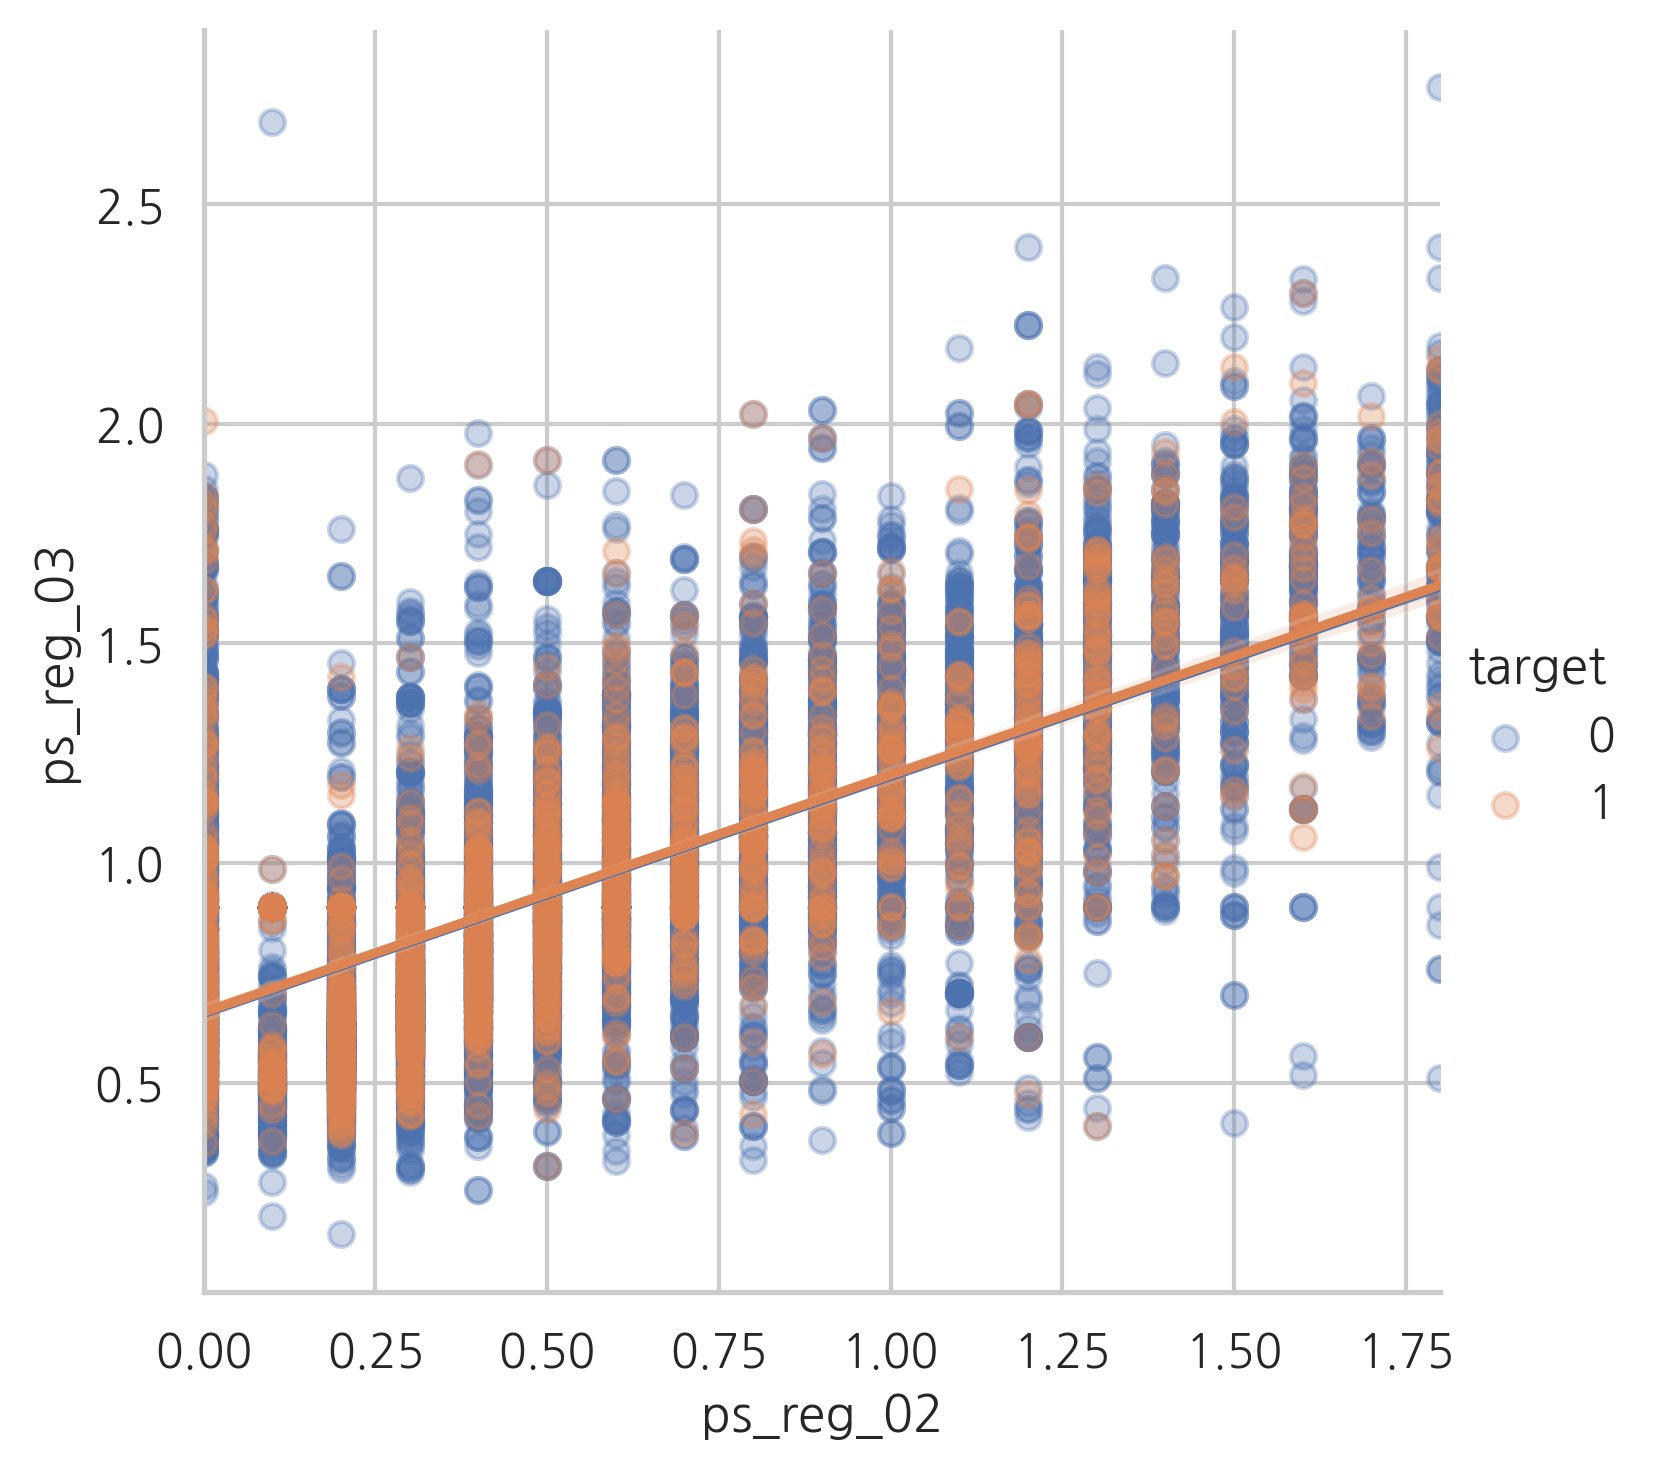

In [25]:
sns.lmplot(x="ps_reg_02", y="ps_reg_03", hue="target", data=s, scatter_kws={'alpha':0.3})
plt.show()

### ps_car_12 and ps_car_13

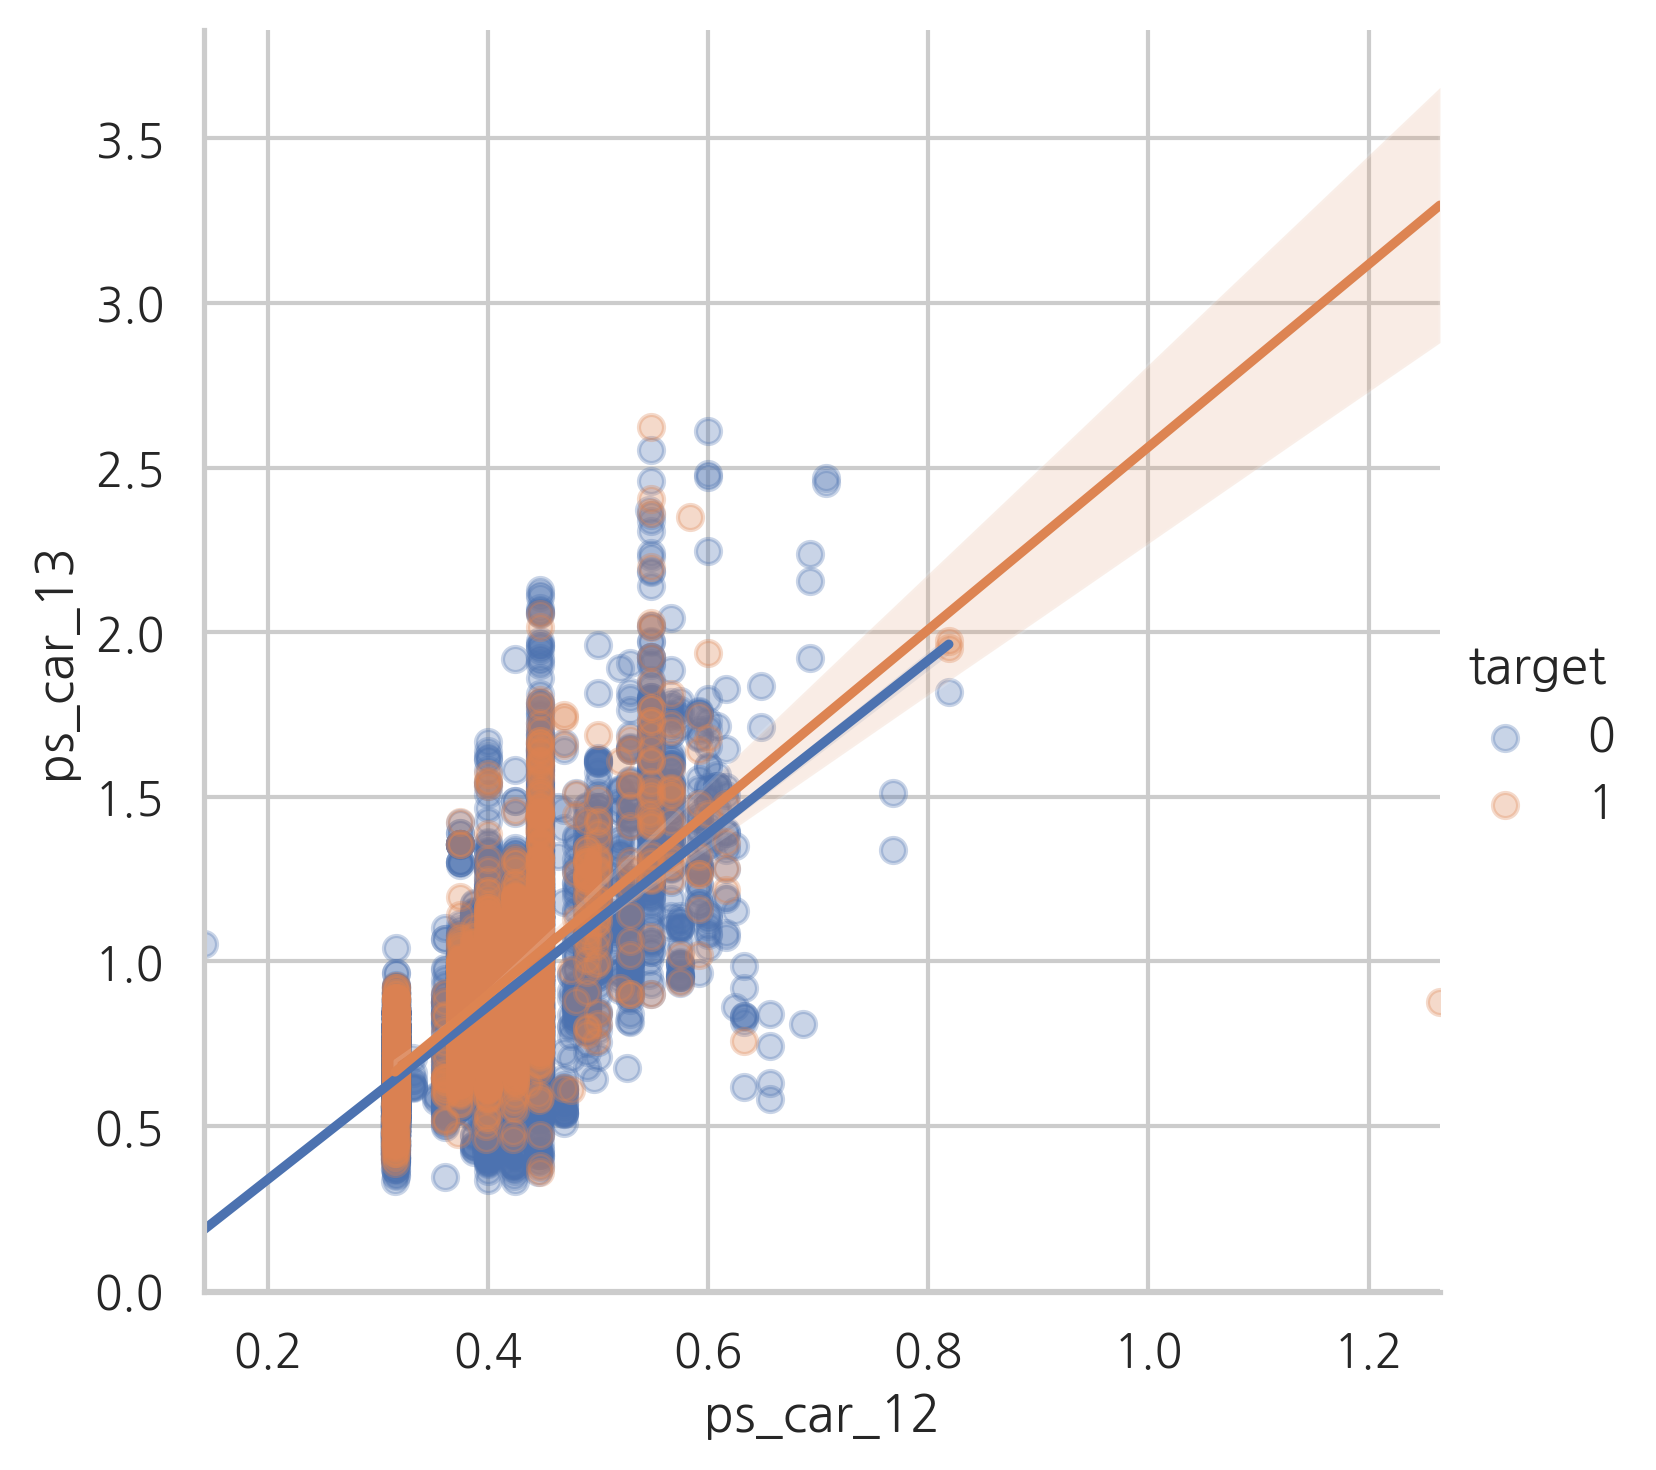

In [26]:
sns.lmplot(x="ps_car_12", y="ps_car_13", data=s, hue="target", scatter_kws={"alpha": 0.3})
plt.show()

### ps_car_12 and ps_car_14

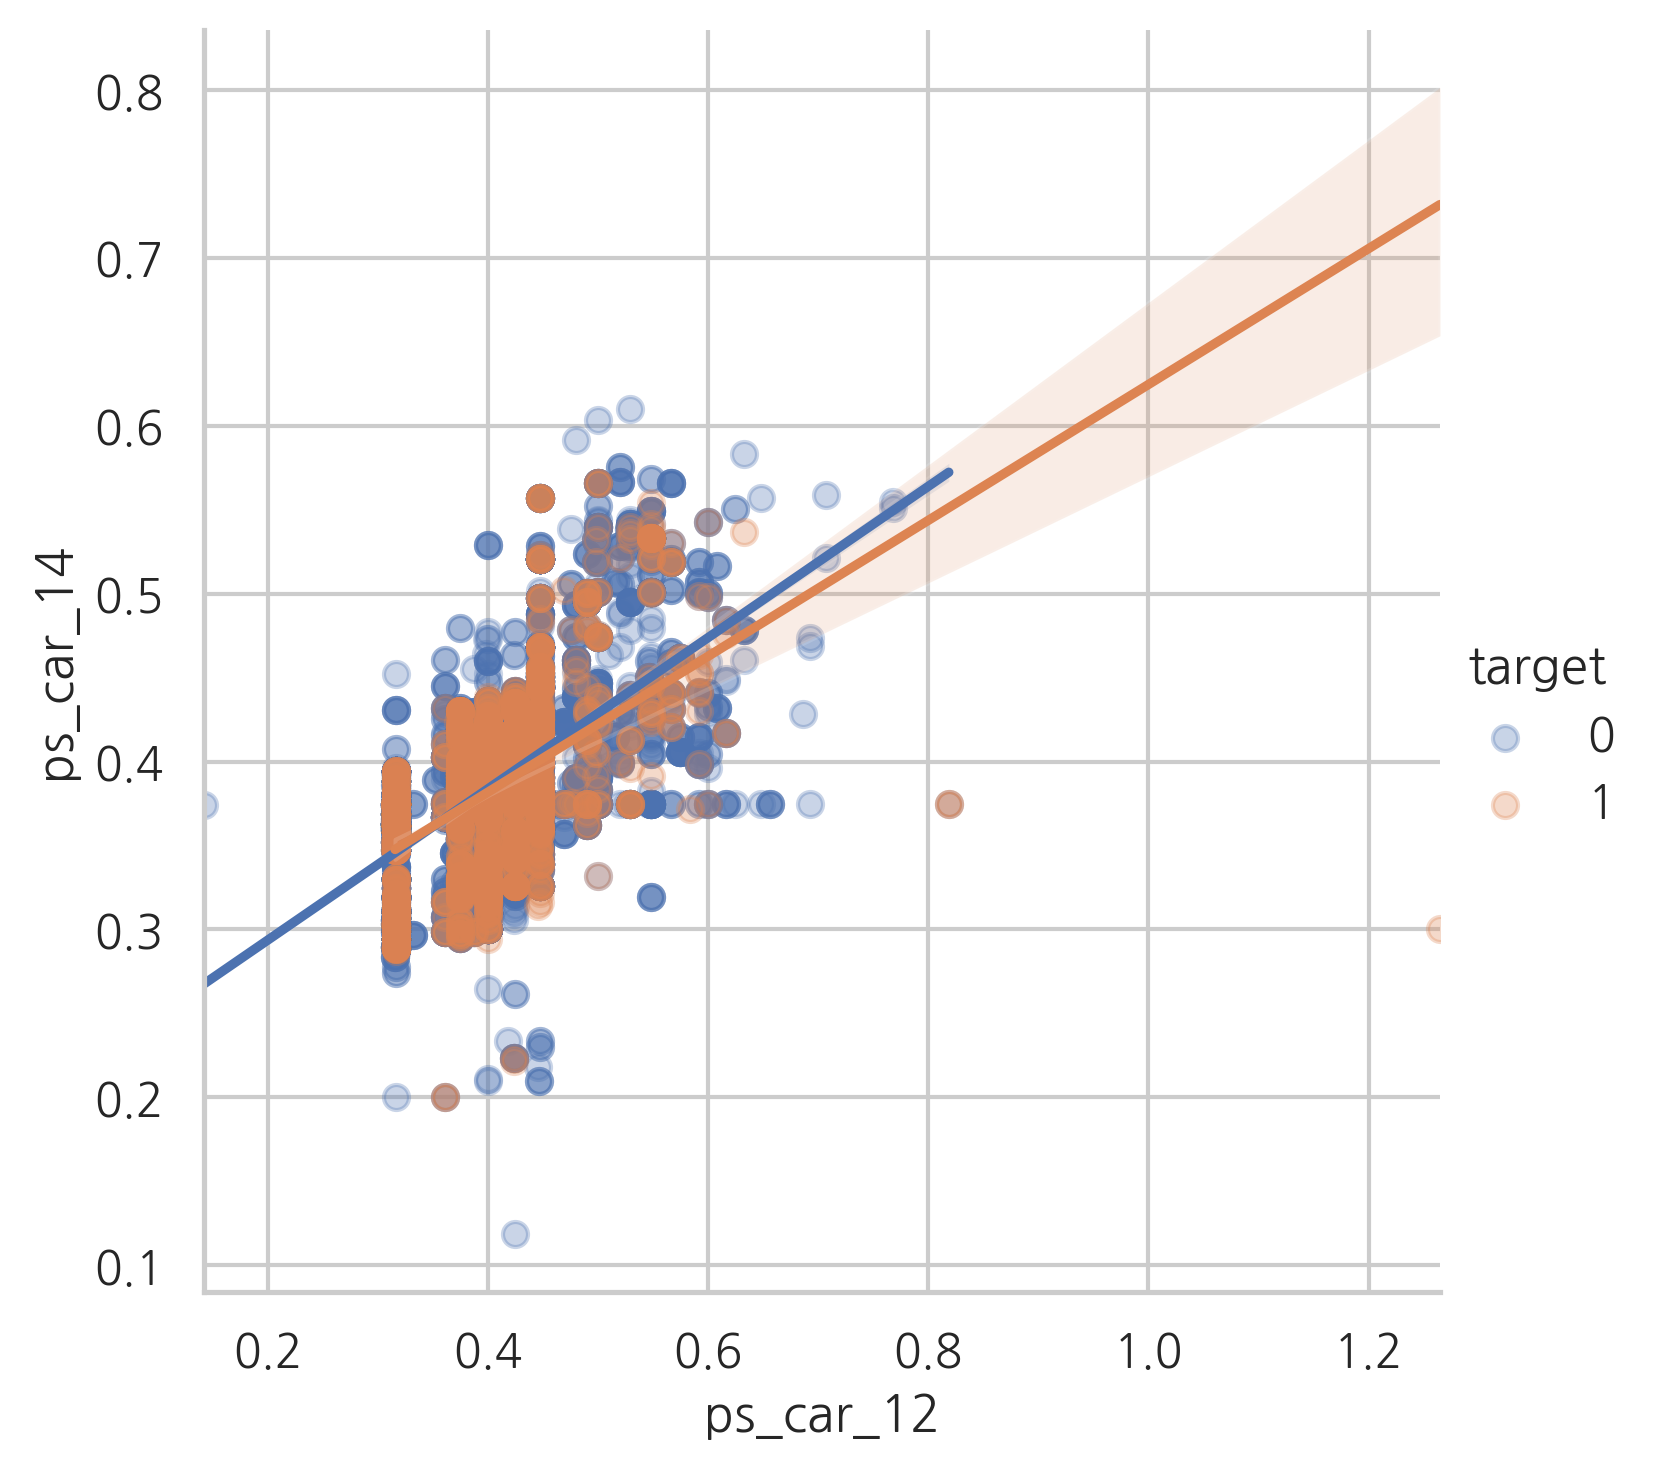

In [27]:
sns.lmplot(x="ps_car_12", y="ps_car_14", data=s, hue="target", scatter_kws={"alpha": 0.3})
plt.show()

### ps_car_13 and ps_car_15

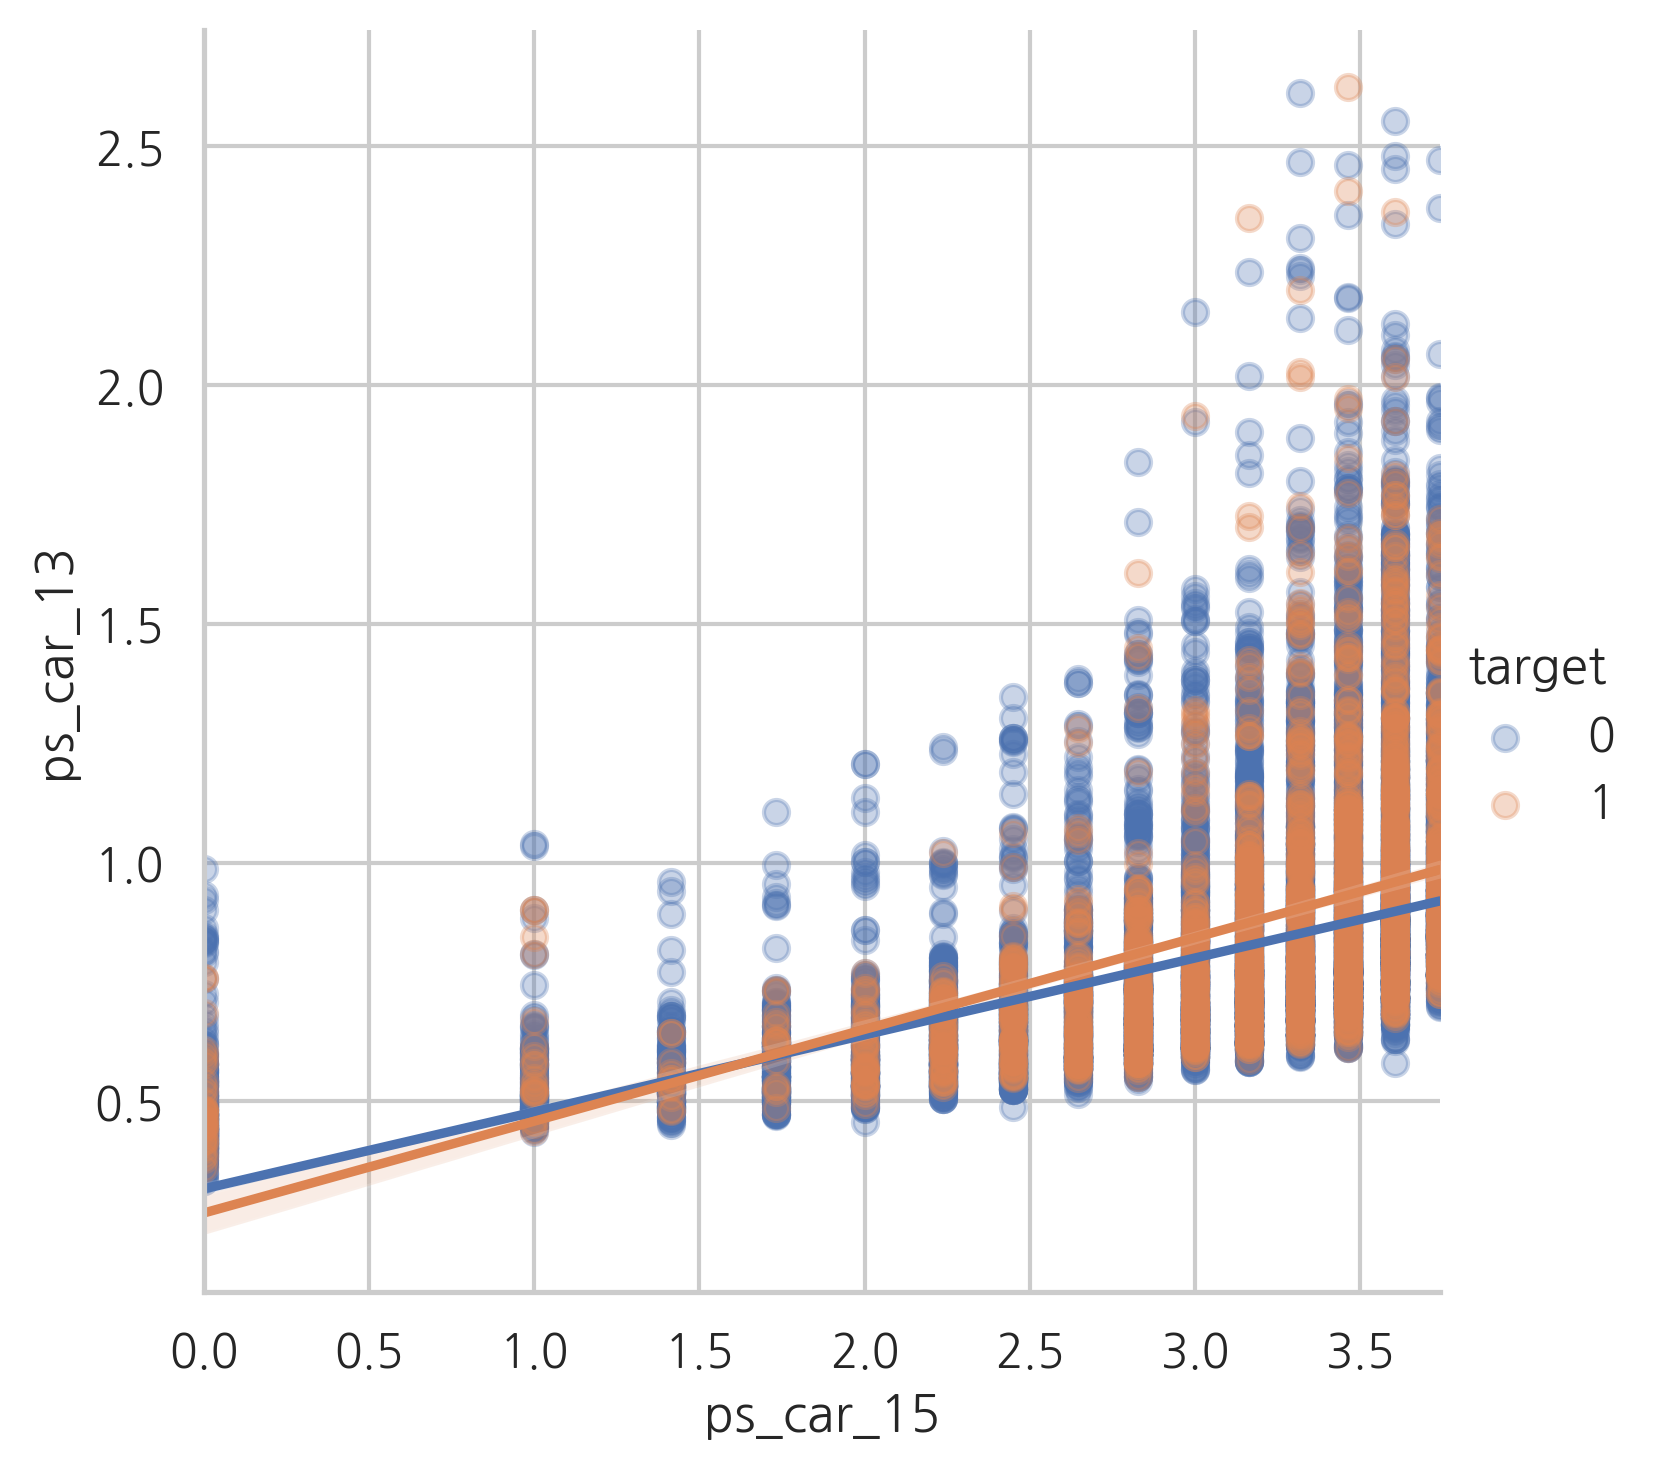

In [28]:
sns.lmplot(x="ps_car_15", y ="ps_car_13", data=s, hue="target", scatter_kws={'alpha':0.3})
plt.show()

이제 이런 상관관계가 있는 변수들을 유지할 것인지 어떻게 결정할 수 있을까요? 우리는 차원을 줄이기 위해 PCA를 수행할 수 있습니다. 하지만 상관관계가 있는 변수들의 수가 적기때문에 그대로 사용합니다.

## Checking the correlations between ordinal variables

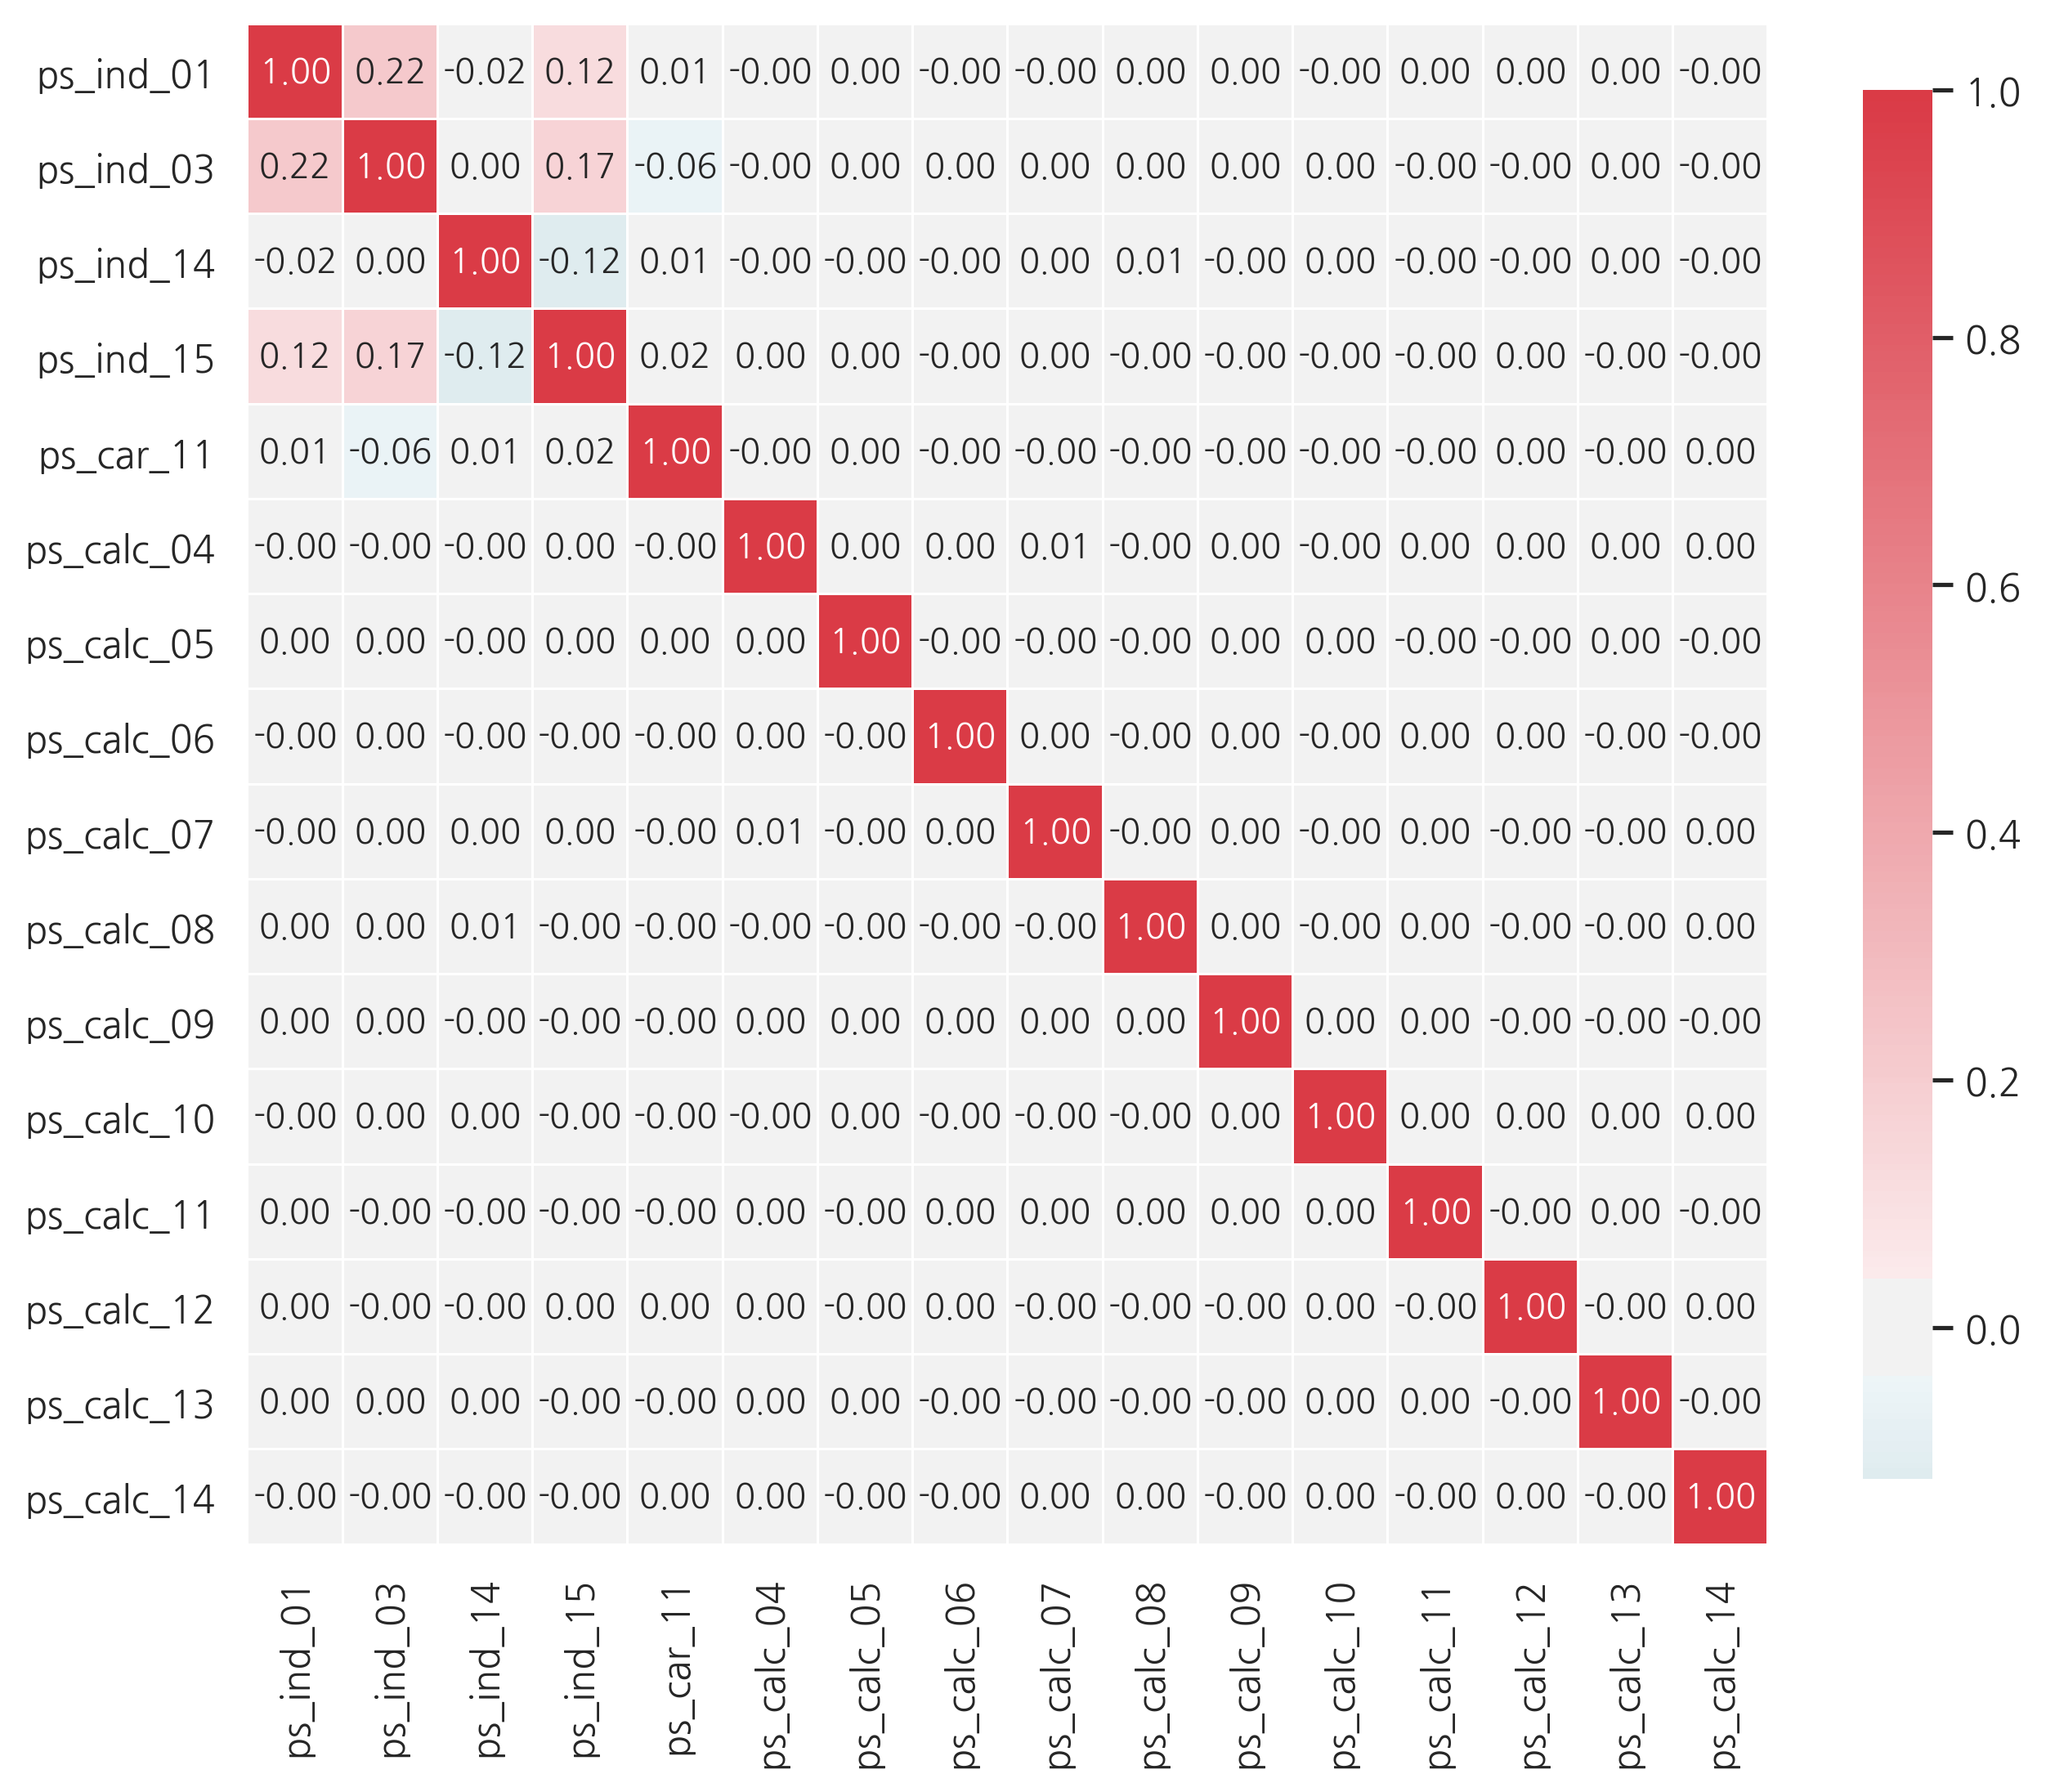

In [29]:
v = meta[(meta.level == "ordinal") & (meta.keep)].index
corr_heatmap(v)

ordinal 변수에서는 상관관계가 커보이지 않습니다.

# Feature engineering
## Creating dummy variables
카테고리형 값들의 변수들은 크기나 순서를 나타내지 않습니다. 예를 들어, category 2는 category 1의 2배가 아닙니다. 따라서, 이러한 변수들을 가변수화 해줍니다.

In [30]:
v = meta[(meta.level == "nominal") & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train, columns=v, drop_first=True)
# drop_first=True는 더미 변수간의 상관관계를 줄여주기 때문에 사용합니다.
# n개의 범주에 대해 n-1개의 결과를 알면 n번째 범주의 결과를 쉽게 예측할 수 있다고 가정합니다
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 109 variables in train


training set에 52개의 더미 변수들을 추가했습니다.

## Creating interaction variables

In [31]:
v = meta[(meta.level == "interval") & (meta.keep)].index
# PolynomialFeatures
# 데이터가 직선의 형태가 아닌 비선형 형태라도, 선형모델을 사용하여 비선형 모델을 학습시킬 수 있다.
# 각 feature의 거듭제곱을 새로운 특성으로 추가, 확장된 feature을 포함한 데이터 세트에 선형모델을 훈련시킨다.
# 이를 polynomial regression이라고 한다.
poly = PolynomialFeatures(degree=2, include_bias=False) # include_bias=False : 맨앞의 1칼럼 제거
# transform from (x1, x2) to (1, x1, x2, x1^2, x1*x2, x2^2)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True) # 원래의 칼럼 제거
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 109 variables in train
After creating interactions we have 164 variables in train


# Feature selection
## Removing features with low or zero variance

원래 예측모형에서 중요한 특징데이터란 종속데이터와의 상관관계가 크고 예측에 도움이 되는 데이터를 말한다. 하지만 상관관계 계산에 앞서 특징데이터의 값 자체가 표본에 따라 그다지 변하지 않는다면 종속데이터 예측에도 도움이 되지 않을 가능성이 높다. 따라서 표본 변화에 따른 데이터 값의 변화 즉, 분산이 기준치보다 낮은 특징 데이터는 사용하지 않는 방법이 분산에 의한 선택 방법이다. 예를 들어 종속데이터와 특징데이터가 모두 0 또는 1 두가지 값만 가지는데 종속데이터는 0과 1이 균형을 이루는데 반해 특징데이터가 대부분(예를 들어 90%)의 값이 0이라면 이 특징데이터는 분류에 도움이 되지 않을 가능성이 높다.

하지만 분산에 의한 선택은 반드시 상관관계와 일치한다는 보장이 없기 때문에 신중하게 사용해야 한다.

In [32]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(["id", "target"], axis=1))
f = np.vectorize(lambda x: not x) # map과 비슷
v = train.drop(["id", "target"], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

28 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


## Selecting features with a Random Forest and SelectFromModel

In [33]:
X_train = train.drop(["id", "target"], axis=1)
y_train = train["target"]

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(rf.feature_importances_)[::-1]

# "[%-*s]" % 30, feat_labels[indices[f]] == feat_labels[indices[f]] 뒤에 30칸 빈칸
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_11_cat_te               0.021280
 2) ps_car_12 ps_car_13            0.017337
 3) ps_car_13                      0.017303
 4) ps_car_13^2                    0.017208
 5) ps_car_13 ps_car_14            0.017085
 6) ps_reg_03 ps_car_13            0.017070
 7) ps_car_13 ps_car_15            0.016841
 8) ps_reg_01 ps_car_13            0.016798
 9) ps_reg_03 ps_car_14            0.016199
10) ps_reg_03 ps_car_12            0.015584
11) ps_reg_03 ps_car_15            0.015066
12) ps_car_14 ps_car_15            0.014932
13) ps_car_13 ps_calc_01           0.014741
14) ps_car_13 ps_calc_03           0.014722
15) ps_reg_01 ps_reg_03            0.014706
16) ps_car_13 ps_calc_02           0.014652
17) ps_reg_02 ps_car_13            0.014606
18) ps_reg_01 ps_car_14            0.014378
19) ps_reg_03^2                    0.014226
20) ps_reg_03                      0.014178
21) ps_reg_03 ps_calc_03           0.013816
22) ps_reg_03 ps_calc_02           0.013796
23) ps_reg_03 ps_calc_01        

SelectFromModel을 통해 사용할 사전 적합 분류기와 feature importance에 대한 임계치를 정할 수 있습니다.

get_support 메소드로는 training data에서의 변수 개수를 제한할 수 있습니다.

In [34]:
sfm = SelectFromModel(rf, threshold="median", prefit=True) # feature 선택
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1] # prefit=True인 경우, transform을 사용해야한다. false인 경우는 fit
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 162
Number of features after selection: 81


In [35]:
train = train[selected_vars + ['target']]

# Feature scaling

scailing을 해주면 모델의 성능이 더 좋아진다.

In [36]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(["target"], axis=1))

array([[-0.45941104, -1.26665356,  1.05087653, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 1.55538958,  0.95034274, -0.63847299, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.05168943, -0.52765479, -0.92003125, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [-0.9631112 ,  0.58084336,  0.48776003, ..., -0.46445747,
         0.18545696,  0.27907892],
       [-0.9631112 , -0.89715418, -1.48314775, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [-0.45941104, -1.26665356,  1.61399304, ...,  0.28148164,
        -0.11358706, -0.72653353]])

# End